# Machine Learning Pipeline - Data Analysis

In the following notebooks, each of the steps of below Machine Learning pipeline would be implemented. 

Machine Learning Pipleline:


1. ***Data Analysis***
2. Feature Enginerring
3. Feature Selection
4. Model Training
5. Obtaining Predictions/Scoring

This notebook is focussed on Data Analysis.


> Dataset Source: Using dataset from [Kaggle](https://www.kaggle.com/datasets/overload10/adult-census-dataset?resource=download) as per project requirement. See below for more details:

===================================================================================================================

## Predicting Adult Census Income

> The aim of this project to build a machine learning model to predict the class of adult census income i.e., whether the sample falls under >50K or <50K based on different explanatory variables describing aspect of the class.

### Why this is important?

> Predicting the class of adult census income would benefit various financial institutions and it would pave the way for fruitful profit for the institutions. It would also help consumer-based services to target the correct consumers.

### What is the objective of the machine learning model?

1. To perform in-depth exploratory data analysis of the datasets.
2. To engineer new predictive features from the available graphs
3. To develop a supervised model to classify census income into >50K and <50K.
4. To recommend a threshold that will perform better in terms of F1 score.
5. To create an API endpoint for the trained model and deploy it.

# Data Analysis

In [1]:
#import required libraries

#to handle datasets
import pandas as pd
import numpy as np

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

#for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#setting the style to white
sns.set_style('white')
#plt.rcParams['figure.dpi'] = 70



In [2]:
#load dataset
df = pd.read_csv('..\\Dataset\\adult.csv')

#rows and columns of the data
print(df.shape)

#visualize the dataset
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Observation:** 

1. There adult census income contains 32651 rows, that is, income category and 15 columns, that is, variables.
2. 14 are predictive variables and 1 is target variable, that is, salary.

In [3]:
#rename columns
df.rename(columns = {'fnlwgt': 'final_weight', 'education-num' : 'education_num', 
                    'marital-status' : 'marital_status', 'capital-gain' : 'capital_gain'
                    , 'capital-loss' : 'capital_loss', 'hours-per-week' : 'hours_per_week'}, inplace = True)

In [4]:
#check datatype of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final_weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
#explore the statistical details

df.describe()

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Observations:**

1. Datatype of the dataset is in the correct format.

2. On visualizing the statistical details of the dataset following observations are drawn:

   - Age:<br> a. The data contains mostly 28-48 age groups adult.<br>
          b. There are outliers as for some data, the age is 90.<br><br>
        
   - Final Weight:<br> a. This is the number of people the census believes the entry represents.<br><br>
   
   - Education Num:<br> By looking into this column, it can be assumed that the column is numerical representation of    
                    education. Further analysis would be done in the later part of the notebook.<br><br>
   
   - Capital Gain:<br> a. For most cases, the values are 0. This needs to be further analyzed whether the 0 is representing                           NA values or not.<br>
                   b. It has maximum value as 99999 and minimum value as 0.<br><br>
                 
   - Capital Loss:<br> a. For most cases, the values are 0. This needs to be further analyzed whether the 0 is representing                           NA values or not.<br>
                   b. It has maximum value as 4356 and minimum value as 0.<br><br>
                 
   - Hours per week:<br> a. On average adults are working for 40 hours per week.<br>
                     b. Minimum 1 hour per week.<br>
                     c. Maximum 99 hours per week.<br><br>
                     


### Analysis

**Following points would be analyzed:**

1. Target Variable<br><br>

2. Variable Types(Categorical and Numerical)<br><br>

3. Missing Data<br><br>

4. Numerical Variables

- Discrete
- Continuous
- Distributions
- Transformations

5. Categorical Variables

- Rare Labels
- Cardinality
- Special Mappings


### Target Variable

Let's explore the target variable

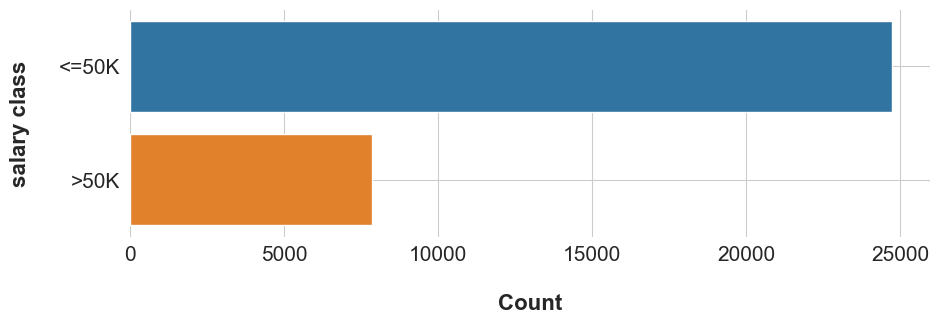

In [73]:
#countplot to visualize the distribution
#Plotting horizontally 
sns.catplot(y='salary',kind = 'count',height = 3, aspect = 3, data=df) 
sns.despine(left=True, bottom=True)
plt.xlabel('\nCount', fontweight='bold', fontsize=16, fontfamily='sans-serif')
plt.ylabel('salary class\n', fontweight='bold', fontsize=16, fontfamily='sans-serif')
# Set the font size of xticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()

In [7]:
print(df.salary.value_counts())
#in percentage
print(df.salary.value_counts()/len(df))

# #Chi-square test
# from scipy.stats import chisquare
# print("\nChi Square test: " + str(chisquare(df.salary.value_counts())))
# #chisquare(df.salary.value_counts().pvalue

salary
 <=50K    24720
 >50K      7841
Name: count, dtype: int64
salary
 <=50K    0.75919
 >50K     0.24081
Name: count, dtype: float64


**Observation:**
- It can be seen that dataset contains 76% of <=50K and 24% of >=50K. The dataset is imbalanced.
- It may lead to biasing/overfitting.
- However, a common rule of thumb is that if the minority class in dataset constitutes less than 10-20% of total data, it     can be considered imbalanced.
- May apply suitable techniques(oversample, undersample etc.) to balance the dataset after reviewing the accuracy metrics score.

### Variable Types
Let's explore categorical and numerical variables

In [8]:
# let's identify the categorical variables
# we will capture those of type *object*

cat_vars = [var for var in df.columns if df[var].dtype == 'O' and var != 'salary']

print("Total numbner of categorical variables: " + str(len(cat_vars)))
print("Column names : " + str(cat_vars))

Total numbner of categorical variables: 8
Column names : ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'country']


In [9]:
# let's identify the numerical variables
# we will capture those of not type *object*

num_vars = [var for var in df.columns if var not in cat_vars and var != 'salary']

print("Total numbner of numerical variables: " + str(len(num_vars)))
print("Column names : " + str(num_vars))

Total numbner of numerical variables: 6
Column names : ['age', 'final_weight', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


**Observation:**
- Out of 14 predictive variables: 8 are categorical variables and 6 are numerical variables.


### Missing Values

Let's find out the missing values

In [10]:
# making a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum()>0]

# determining percentage of missing values (expressed as decimals)
# and displaying the result ordered by % of missin data
df[vars_with_na].isnull().mean().sort_values(ascending = False)


Series([], dtype: float64)

In [11]:
df.isnull().any()

age               False
workclass         False
final_weight      False
education         False
education_num     False
marital_status    False
occupation        False
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hours_per_week    False
country           False
salary            False
dtype: bool

In [12]:
#That's strange the data looks clean. Let's explore the data more.
#Let's print unique value of the predictive variable
for col in df.columns:
    print(col)
    print(df[col].unique())

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
final_weight
[ 77516  83311 215646 ...  34066  84661 257302]
education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education_num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital_status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Mac

In [13]:
#It can be observed that categorical variables has extra space at the start of the values. 
#Let's clean the spaces with strip()/replace() function. 
#Using replace as there is a need to remove '?'

#data = df.copy()
df[cat_vars] = df[cat_vars]
# replace field that's entirely space (or empty) with NaN
df = df.replace(r'\s', '', regex=True)
df = df.replace(r'\?', np.nan, regex=True)
for col in cat_vars:
    #data[col] = data[col].str.strip()
    print(col)
    print(df[col].unique())



workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital_status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex
['Male' 'Female']
country
['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'German

In [14]:
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
df[df['workclass'] == ' ?']

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,salary


In [16]:
#Let's repeat the steps of finding missing value once again and let's visualize the results.
df.isnull().any()

age               False
workclass          True
final_weight      False
education         False
education_num     False
marital_status    False
occupation         True
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hours_per_week    False
country            True
salary            False
dtype: bool

In [17]:
# making a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum()>0]

# determining percentage of missing values (expressed as decimals)
# and displaying the result ordered by % of missin data
df[vars_with_na].isnull().mean().sort_values(ascending = False)

occupation    0.056601
workclass     0.056386
country       0.017905
dtype: float64

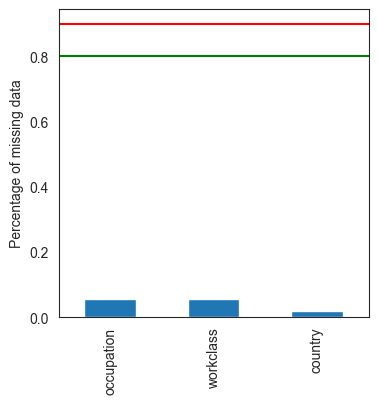

In [18]:
# plot

df[vars_with_na].isnull().mean().sort_values(ascending = False).plot.bar(figsize=(4, 4))
plt.ylabel('Percentage of missing data')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')

plt.show()

**Observation:**
- It has been observed that for all categorical variables there were extra whitespaces. These spaces are occurring due to     coding logic of the source systems. These whitespaces needs to be removed for performing machine learning techniques.<br><br>
- Missing data in original source is present as ' ?'. <br><br>
- The percentage of missing values are at bare minimum. <br><br>
- 3 categorical variables has missing values.<br><br>
- Numerical variables may have the missing values and those may be represented as 0. This can be confirmed once distribution plot are visualized and, relationship between target and numerical predictive variables are drawn.

### Relationship between Missing Data and Salary

In [117]:
def analyze_na_values(df, var):
    #create a deep copy of the dataframe
    data = df.copy()
    #na value is assigned as 0 and 1 is for real values
    data[var] = np.where(data[var].isna(), 0, 1)
    #<=50K is mapped to 0 and >50K is mapped to 1
    data['salary'] = np.where(data['salary'] == '<=50K', 0, 1)
    #finding the mean and standard deviation
    gp = data.groupby(var)['salary'].agg(['mean','std'])
    
    # plot into a bar graph
    ax = gp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Salary Class", color='green')
    
    #In other notebook, we will try monkey patching
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.grid(True)

    plt.show()
    
    

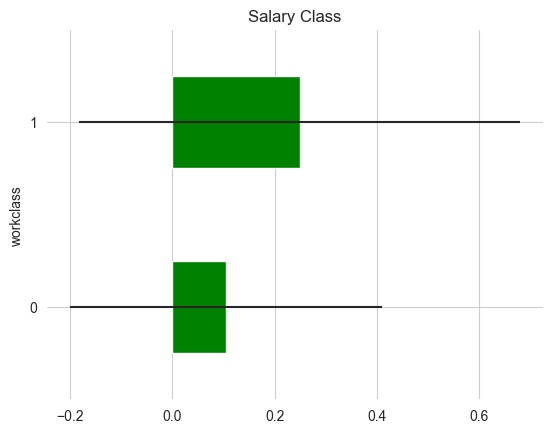

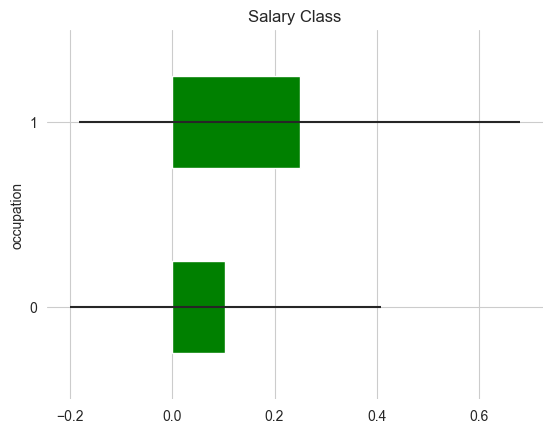

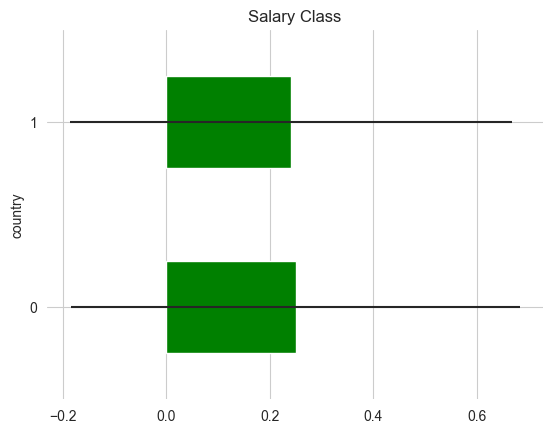

In [118]:
# let's run the function on each variable with missing data

for var in vars_with_na:
    analyze_na_values(df, var)

**Observation:**
- It can be observed that the mean Salary where information is missing, differs from the mean Salary where information exists but the standard deviation overlaps. This suggests that the missing data could be or could not be good predictor of salary. Hence, we would check later whether we can drop these values or not.

### Numerical Variables

Let's check what type of numerical variables we have in the dataset

In [21]:
print('Number of numerical variables', len(num_vars))

#visualize the numerical variables dataset
df[num_vars].head()

Number of numerical variables 6


,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


#### Temporal Variables

It can be observed that there are no temporal variables in the dataset.

#### Discrete Variable

Let's go ahead and find which variables are discrete, i.e., show a finite number of values

In [22]:
#Let's make a list of discrete variables and print it

discrete_vars = [var for var in num_vars if len(df[var].unique())<20]

print("Number of discrete variables : {} , the variables are {}".format(len(discrete_vars), discrete_vars))

Number of discrete variables : 1 , the variables are ['education_num']


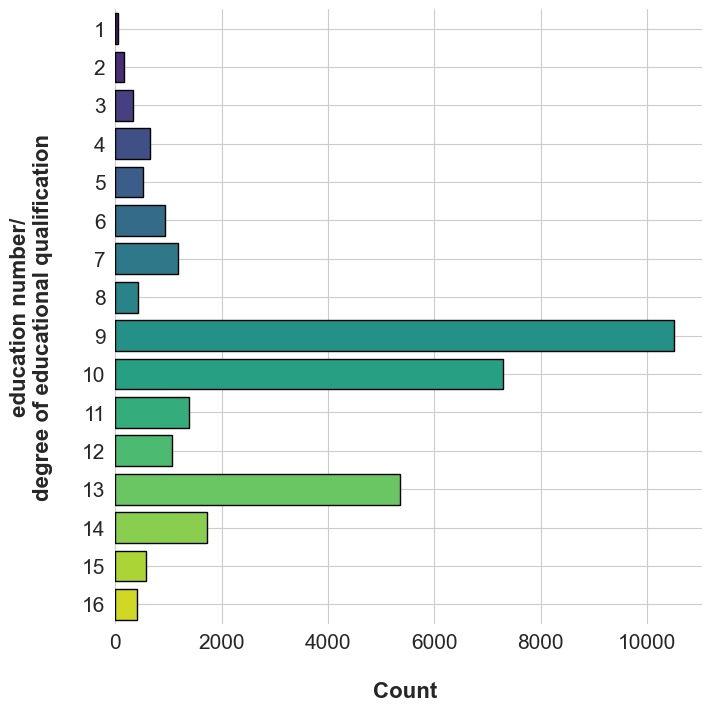

In [72]:
#countplot to visualize the distribution
#Plotting horizontally 
fig, ax = plt.subplots(figsize=(7, 7),
                       layout='constrained')
sns.countplot(y=df['education_num'],palette='viridis',saturation=0.9,edgecolor="black", ax= ax)
#sns.countplot(x='salary', hue = 'education_num',ax=ax, data=df) 
#sns.catplot(x='salary',kind = 'count', hue = 'education_num',ax=ax, height = 4, aspect = 3, data=df) 
sns.despine(left=True, bottom=True)
plt.xlabel('\nCount ', fontweight='bold', fontsize=16, fontfamily='sans-serif')
plt.ylabel('education number/\ndegree of educational qualification\n', fontweight='bold', fontsize=16, fontfamily='sans-serif')
# Set the font size of xticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()

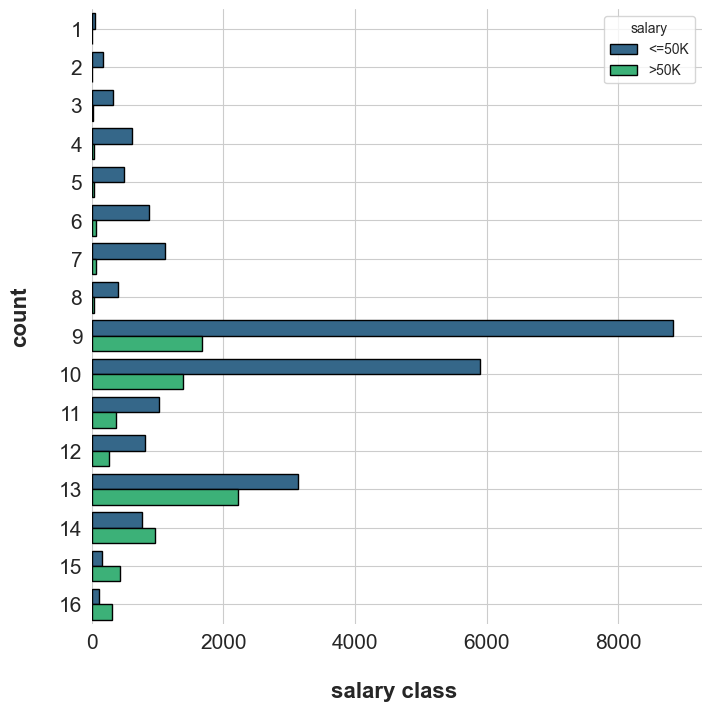

In [74]:
#countplot to visualize the distribution against salary
#Plotting horizontally 
fig, ax = plt.subplots(figsize=(7, 7),
                       layout='constrained')
sns.countplot(y=df['education_num'],hue=df['salary'],palette='viridis',saturation=0.9,edgecolor="black", ax= ax)
#sns.countplot(x='salary', hue = 'education_num',ax=ax, data=df) 
#sns.catplot(x='salary',kind = 'count', hue = 'education_num',ax=ax, height = 4, aspect = 3, data=df) 
sns.despine(left=True, bottom=True)
plt.xlabel('\nsalary class ', fontweight='bold', fontsize=16, fontfamily='sans-serif')
plt.ylabel('count\n', fontweight='bold', fontsize=16, fontfamily='sans-serif')
# Set the font size of xticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()

In [63]:
#It can be assumed that these variable represents categorical variable - education. 
#This variable is the numerical represenation of the categorical variable. It can be verified. Refer below.
unique_val = df[['education_num', 'education']].drop_duplicates().reset_index().drop('index', axis = 1).sort_values(by = 'education_num')

print(unique_val)

    education_num     education
14              1     Preschool
13              2       1st-4th
11              3       5th-6th
8               4       7th-8th
4               5           9th
12              6          10th
2               7          11th
15              8          12th
1               9       HS-grad
5              10  Some-college
7              11     Assoc-voc
6              12    Assoc-acdm
0              13     Bachelors
3              14       Masters
10             15   Prof-school
9              16     Doctorate


**Observation:**
- There is only one discrete numerical variable i.e, education_num
- From above visualization, it's proved that education-num and education shows direct relationship.
- In feature selection, education variable can be dropped as education_num is the encoding value of education.
- This dataset suggests that most of the adults have educational qualifications till HS-Grad. It also suggests that there are very less adults who has educational qualifications till preschool as the dataset targets only salaried adults.
- Adults with education qualifications till HS-Grad, has the highest number of adults with <=50k salary.
- Adults with education qualifications till Bachelors, has the highest sample of >50k salary.
- Adults with education qualifications till Pre-School, has the lowest samples of both <=50k and >50k salary.
- These education num suggests that adults with higher education num/education qualifactions are likely to have good salary. Education qualifications shows direct relationship with salary class.

#### Continuous Variable
Let's go ahead and find the distribution of the continuous variables. We will consider continuous variables to all those that are not temporal or discrete.

In [57]:
# make list of continuous variables
cont_vars = [var for var in num_vars if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars))
print('Continuous variables are: ', cont_vars)

Number of continuous variables:  5
Continuous variables are:  ['age', 'final_weight', 'capital_gain', 'capital_loss', 'hours_per_week']


In [58]:
#let's visualize the continuous variable dataframe
df[cont_vars].head()

,age,final_weight,capital_gain,capital_loss,hours_per_week
0,39,77516,2174,0,40
1,50,83311,0,0,13
2,38,215646,0,0,40
3,53,234721,0,0,40
4,28,338409,0,0,40


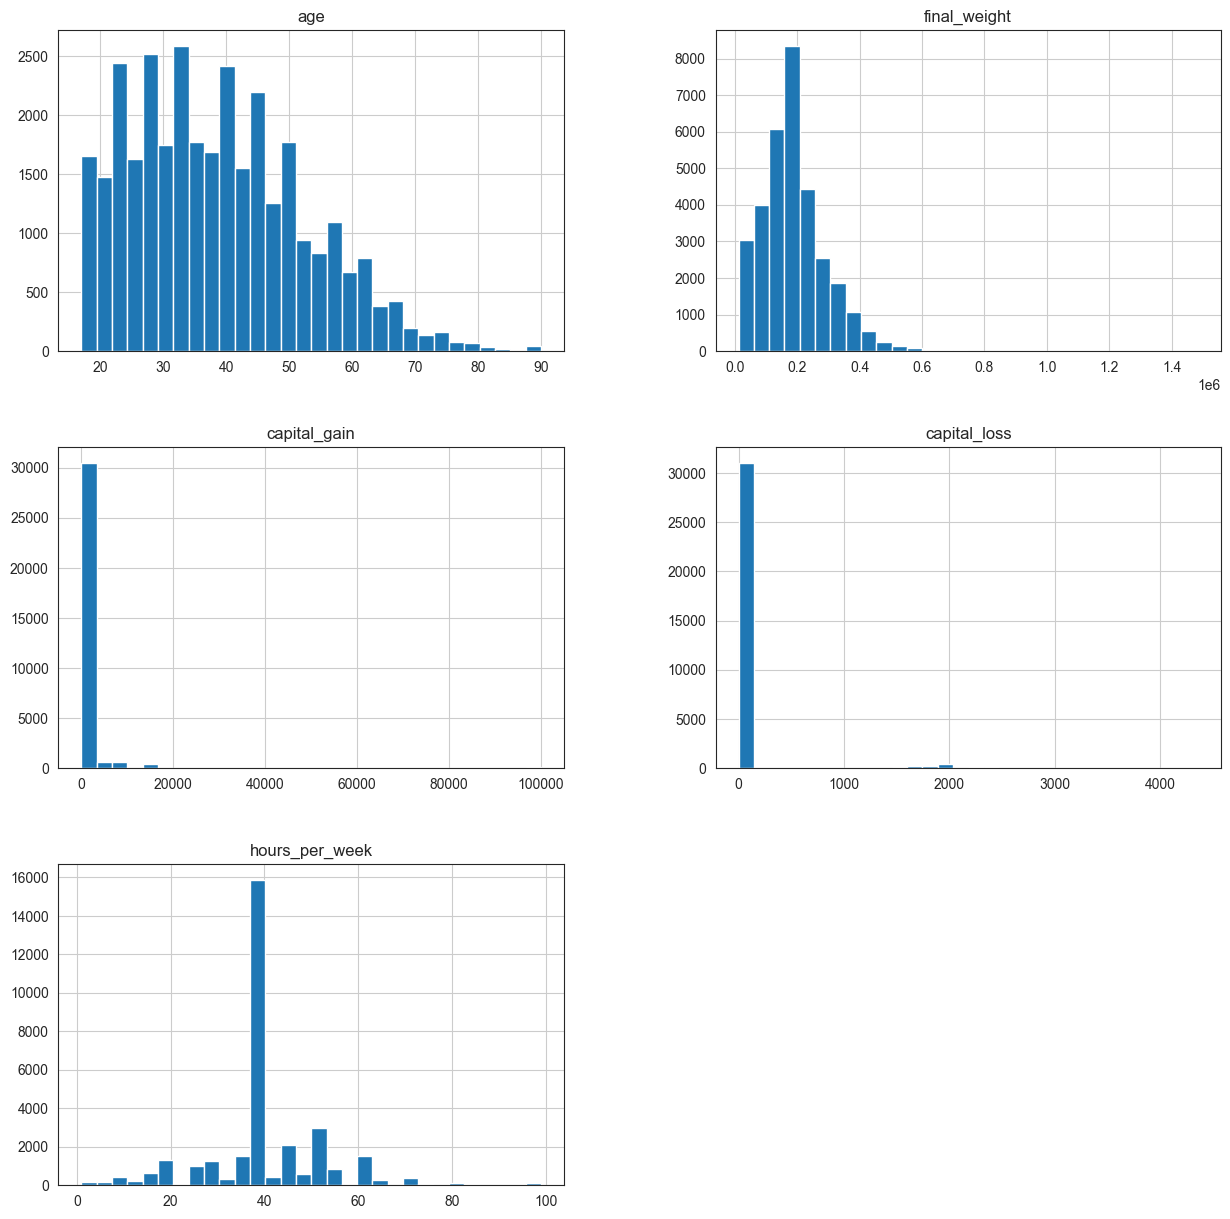

In [65]:
# lets plot histograms for all continuous variables
# will be using dataframe.hist()
df[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

The variables are not normally distributed. Capital Gain and Capital Loss are highly skewed. 

Sometimes, transforming the variables to improve the value spread, improves the model performance. But it is unlikely that transformation will help to change the distribution of highly skewed variable.

Will apply Yeo-Johnson transformation to variables like age, final_weight, hours_per_week. Will apply binary transformation to highly skewed variable like capital_gain and capital_loss.

In [66]:
#highly Skewed variables
skewed_vars = ['capital_gain','capital_loss']

#capturing the remaining variables
cont_skew_var = ['age', 'final_weight', 'hours_per_week']

Yeo-Johnson Transformation

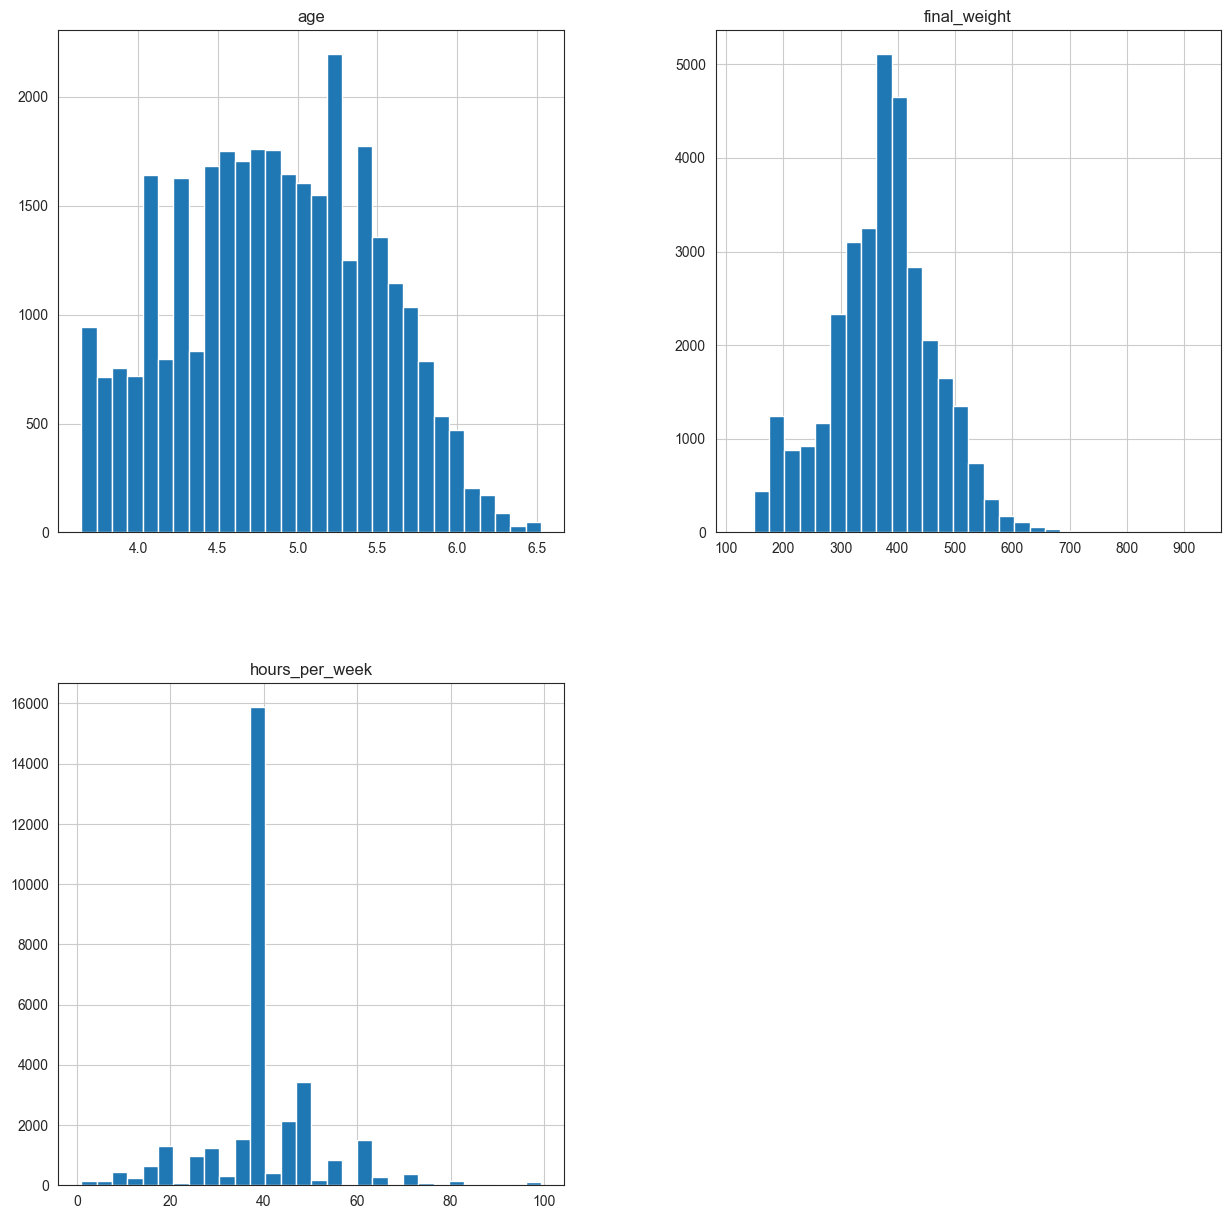

In [114]:
# Let's go ahead and analyse the distributions of the variables
# after applying a yeo-johnson transformation

# for the yeo-johnson transformation
import scipy.stats as stats

# temporary copy of the data
tmp = df.copy()

for var in cont_skew_var:

    # transform the variable - yeo-johsnon
    tmp[var], param = stats.yeojohnson(df[var])
    #print(param)

    
# plot the histograms of the transformed variables
ax = tmp[cont_skew_var].hist(bins=30, figsize=(15,15))
# Despine
#It works
# ax = ax[0]
#     for x in ax:
#         x.spines['right'].set_visible(False)
#         x.spines['top'].set_visible(False)
#         x.spines['left'].set_visible(False)

plt.show()

The values seem to be spread more evenly in the range.

Whether this helps improve the predictive power, remains to be seen. To determine if this is the case, we should train a model with the original values and one with the transformed values, and determine model performance, and feature importance.

Let's explore these variables against salary.

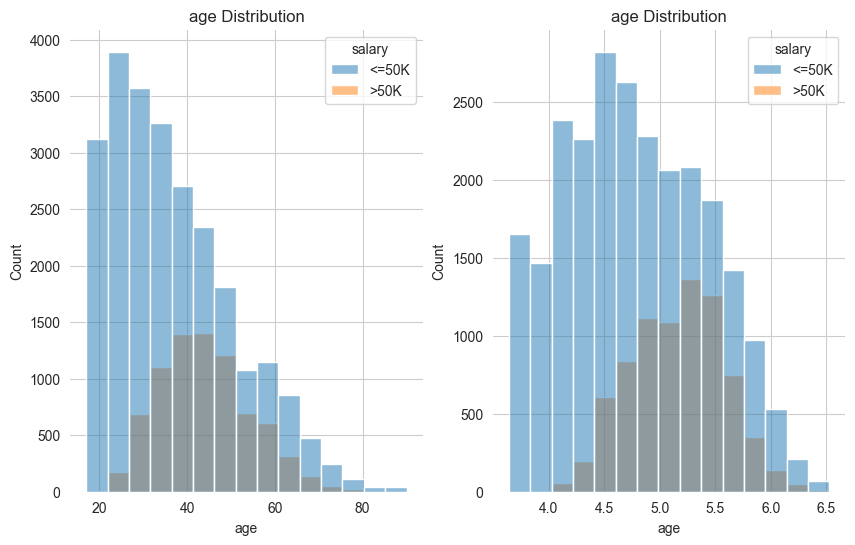

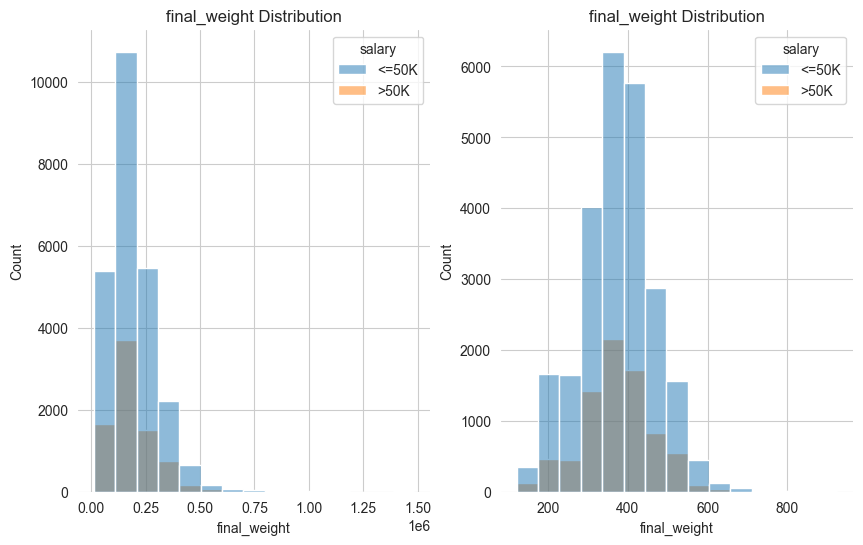

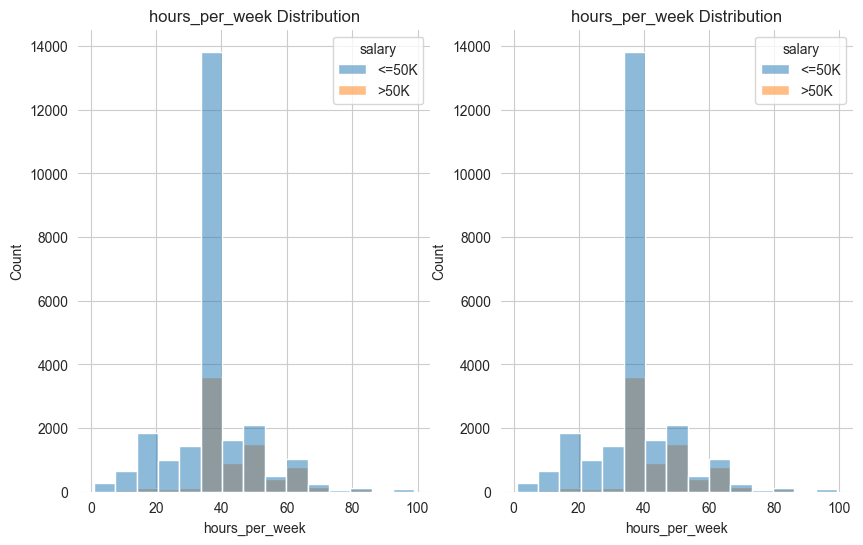

In [90]:
def visualize_cont_variable(var):
    plt.figure(figsize=(10,6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(x=df[var],hue=df['salary'],color='green',bins=15)
    plt.grid(True)
    plt.title(var + ' Distribution')
    sns.despine(left=True, bottom=True)
    #plt.show()
    
    plt.subplot(1, 2, 2)
    sns.histplot(x=tmp[var],hue=df['salary'],color='green',bins=15)
    plt.grid(True)
    plt.title(var + ' Distribution')
    sns.despine(left=True, bottom=True)
    plt.show()
    
    
for var in cont_skew_var:
    visualize_cont_variable(var)

By eye, the transformations seem to improve the relationship for final_weight. The distribution for hours_per_week looks normal with and without transformations.

Let's try a different transformation now. Will apply logarithmic transformation for ['age']

#### Logarithmic Transformations

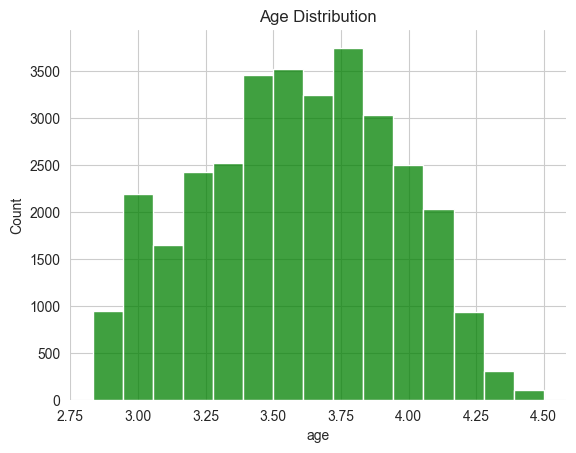

In [94]:
# Let's go ahead and analyse the distributions of these variables
# after applying a logarithmic transformation

tmp = df.copy()


# transform the variable with logarithm
tmp['age'] = np.log(df['age'])
    
sns.histplot(x=tmp['age'],color='green',bins=15)
plt.grid(True)
plt.title('Age Distribution')
sns.despine(left=True, bottom=True)
plt.show()

The distribution of the variables are now more "Gaussian" looking.

Let's go ahead and evaluate their relationship with the target.

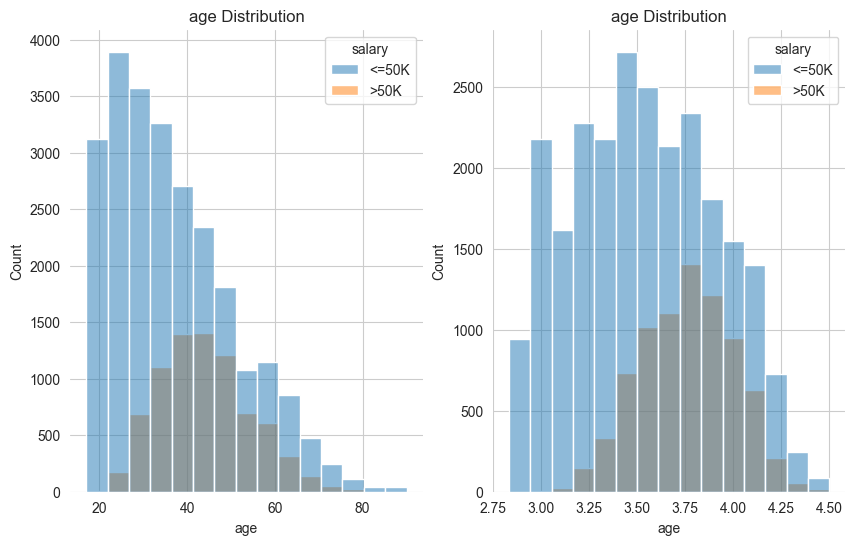

In [95]:
visualize_cont_variable('age')

#### Skewed Variable

Let's transform them into binary variable and see how predictive they are:

                  mean       std
capital_gain                    
0             0.206506  0.404805
1             0.618363  0.485878


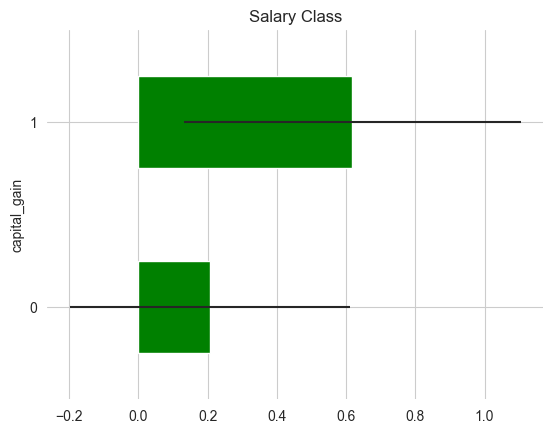

                  mean       std
capital_loss                    
0             0.227692  0.419349
1             0.508887  0.500086


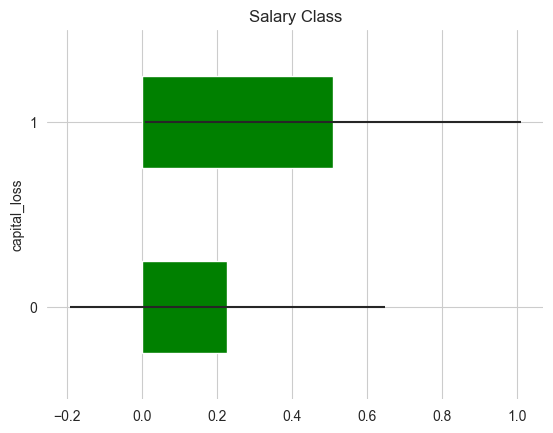

In [101]:
for var in skewed_vars:
    
    tmp = df.copy()
    
    #map the varaibles values into 0 and 1
    
    tmp[var] = np.where(tmp[var]==0,0,1)
    tmp['salary'] = np.where(tmp['salary'] == '<=50K', 0, 1)
    #determine mean and standard deviation of the salary in the mapped values
    tmp = tmp.groupby(var)['salary'].agg(['mean', 'std'])
    print(tmp)
    #plot into a bar graph
       # plot into a bar graph
    ax = tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Salary Class", color='green')
    #In other notebook, we will try monkey patching
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.grid(True)

    plt.show()

There is difference in mean but there is overlapping in standard deviation. These festures may turn to be predictive or may not be predictive. Will decide while doing feture selection.

**Observation:**
- There are 5 continuous varaibles. These variables are slightly skewed and heavily skewed. Different transformations techniques needs to be applied to transform the vraiables to normally distributed.

### Categorical Variables

Let's analyze the categorical variables present in the dataset.

country           41
education         16
occupation        14
workclass          8
marital_status     7
relationship       6
race               5
sex                2
dtype: int64


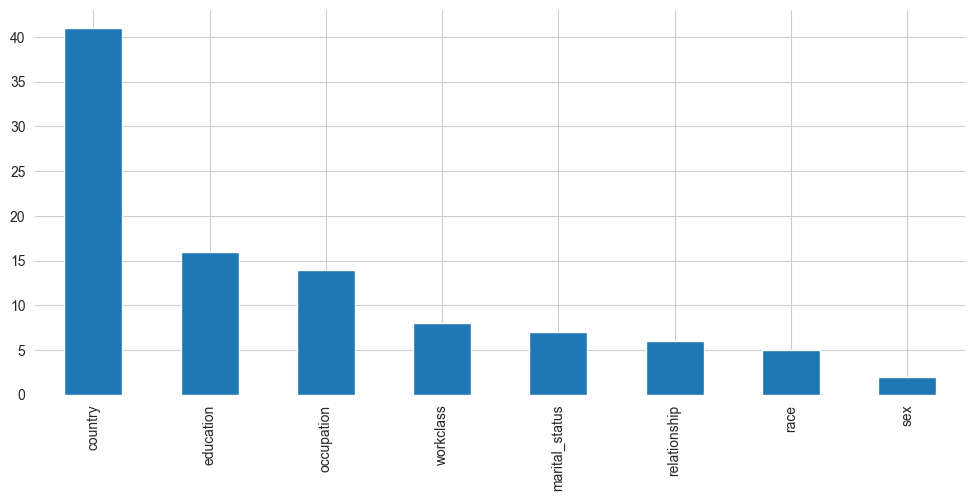

In [119]:
# we count unique categories with pandas unique() 
# and then plot them in descending order
print(df[cat_vars].nunique().sort_values(ascending=False))
ax = df[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))
   #In other notebook, we will try monkey patching
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.grid(True)

plt.show()

All the categorical variables show low cardinality, this means that they have only few different labels.

It can be seen that apart from education, all the variables are nominal variables. Earlier, it has been found that numeric variable education_num and education are same and the variable relationship has been already visualized.

Hence, in below section, analysis would be done for the nominal varaibles.

In [233]:
#countplot to visualize the distribution
#Plotting horizontally 
def visualize_nominal_variables(df, var, hue):
    df = df.copy()
    unique = df[var].nunique()
    if unique <= 10:
        width = unique*5
        height = unique*2
    else:
        width = unique*0.6
        height = unique*0.6
        
    fig, ax = plt.subplots(figsize=(width, height),
                           layout='constrained')

    if hue == False:
        sns.countplot(y=df[var],palette='viridis',saturation=0.9,edgecolor="black", ax= ax)
    else:
        gfg = sns.countplot(y=df[var],hue = df['salary'], palette='viridis',saturation=0.9,edgecolor="black", ax= ax)
        plt.setp(gfg.get_legend().get_texts(), fontsize=width) 
        #for legend title
        plt.setp(gfg.get_legend().get_title(), fontsize=width)
        
    #sns.countplot(x='salary', hue = 'education_num',ax=ax, data=df) 
    #sns.catplot(x='salary',kind = 'count', hue = 'education_num',ax=ax, height = 4, aspect = 3, data=df) 
    sns.despine(left=True, bottom=True)
    plt.xlabel('\nCount ', fontweight='bold', fontsize=width, fontfamily='sans-serif')
    plt.ylabel(var + '\n', fontweight='bold', fontsize=width, fontfamily='sans-serif')
    # Set the font size of xticks
    plt.xticks(fontsize=width)
    plt.yticks(fontsize=width)
    plt.grid(True)
    plt.show()

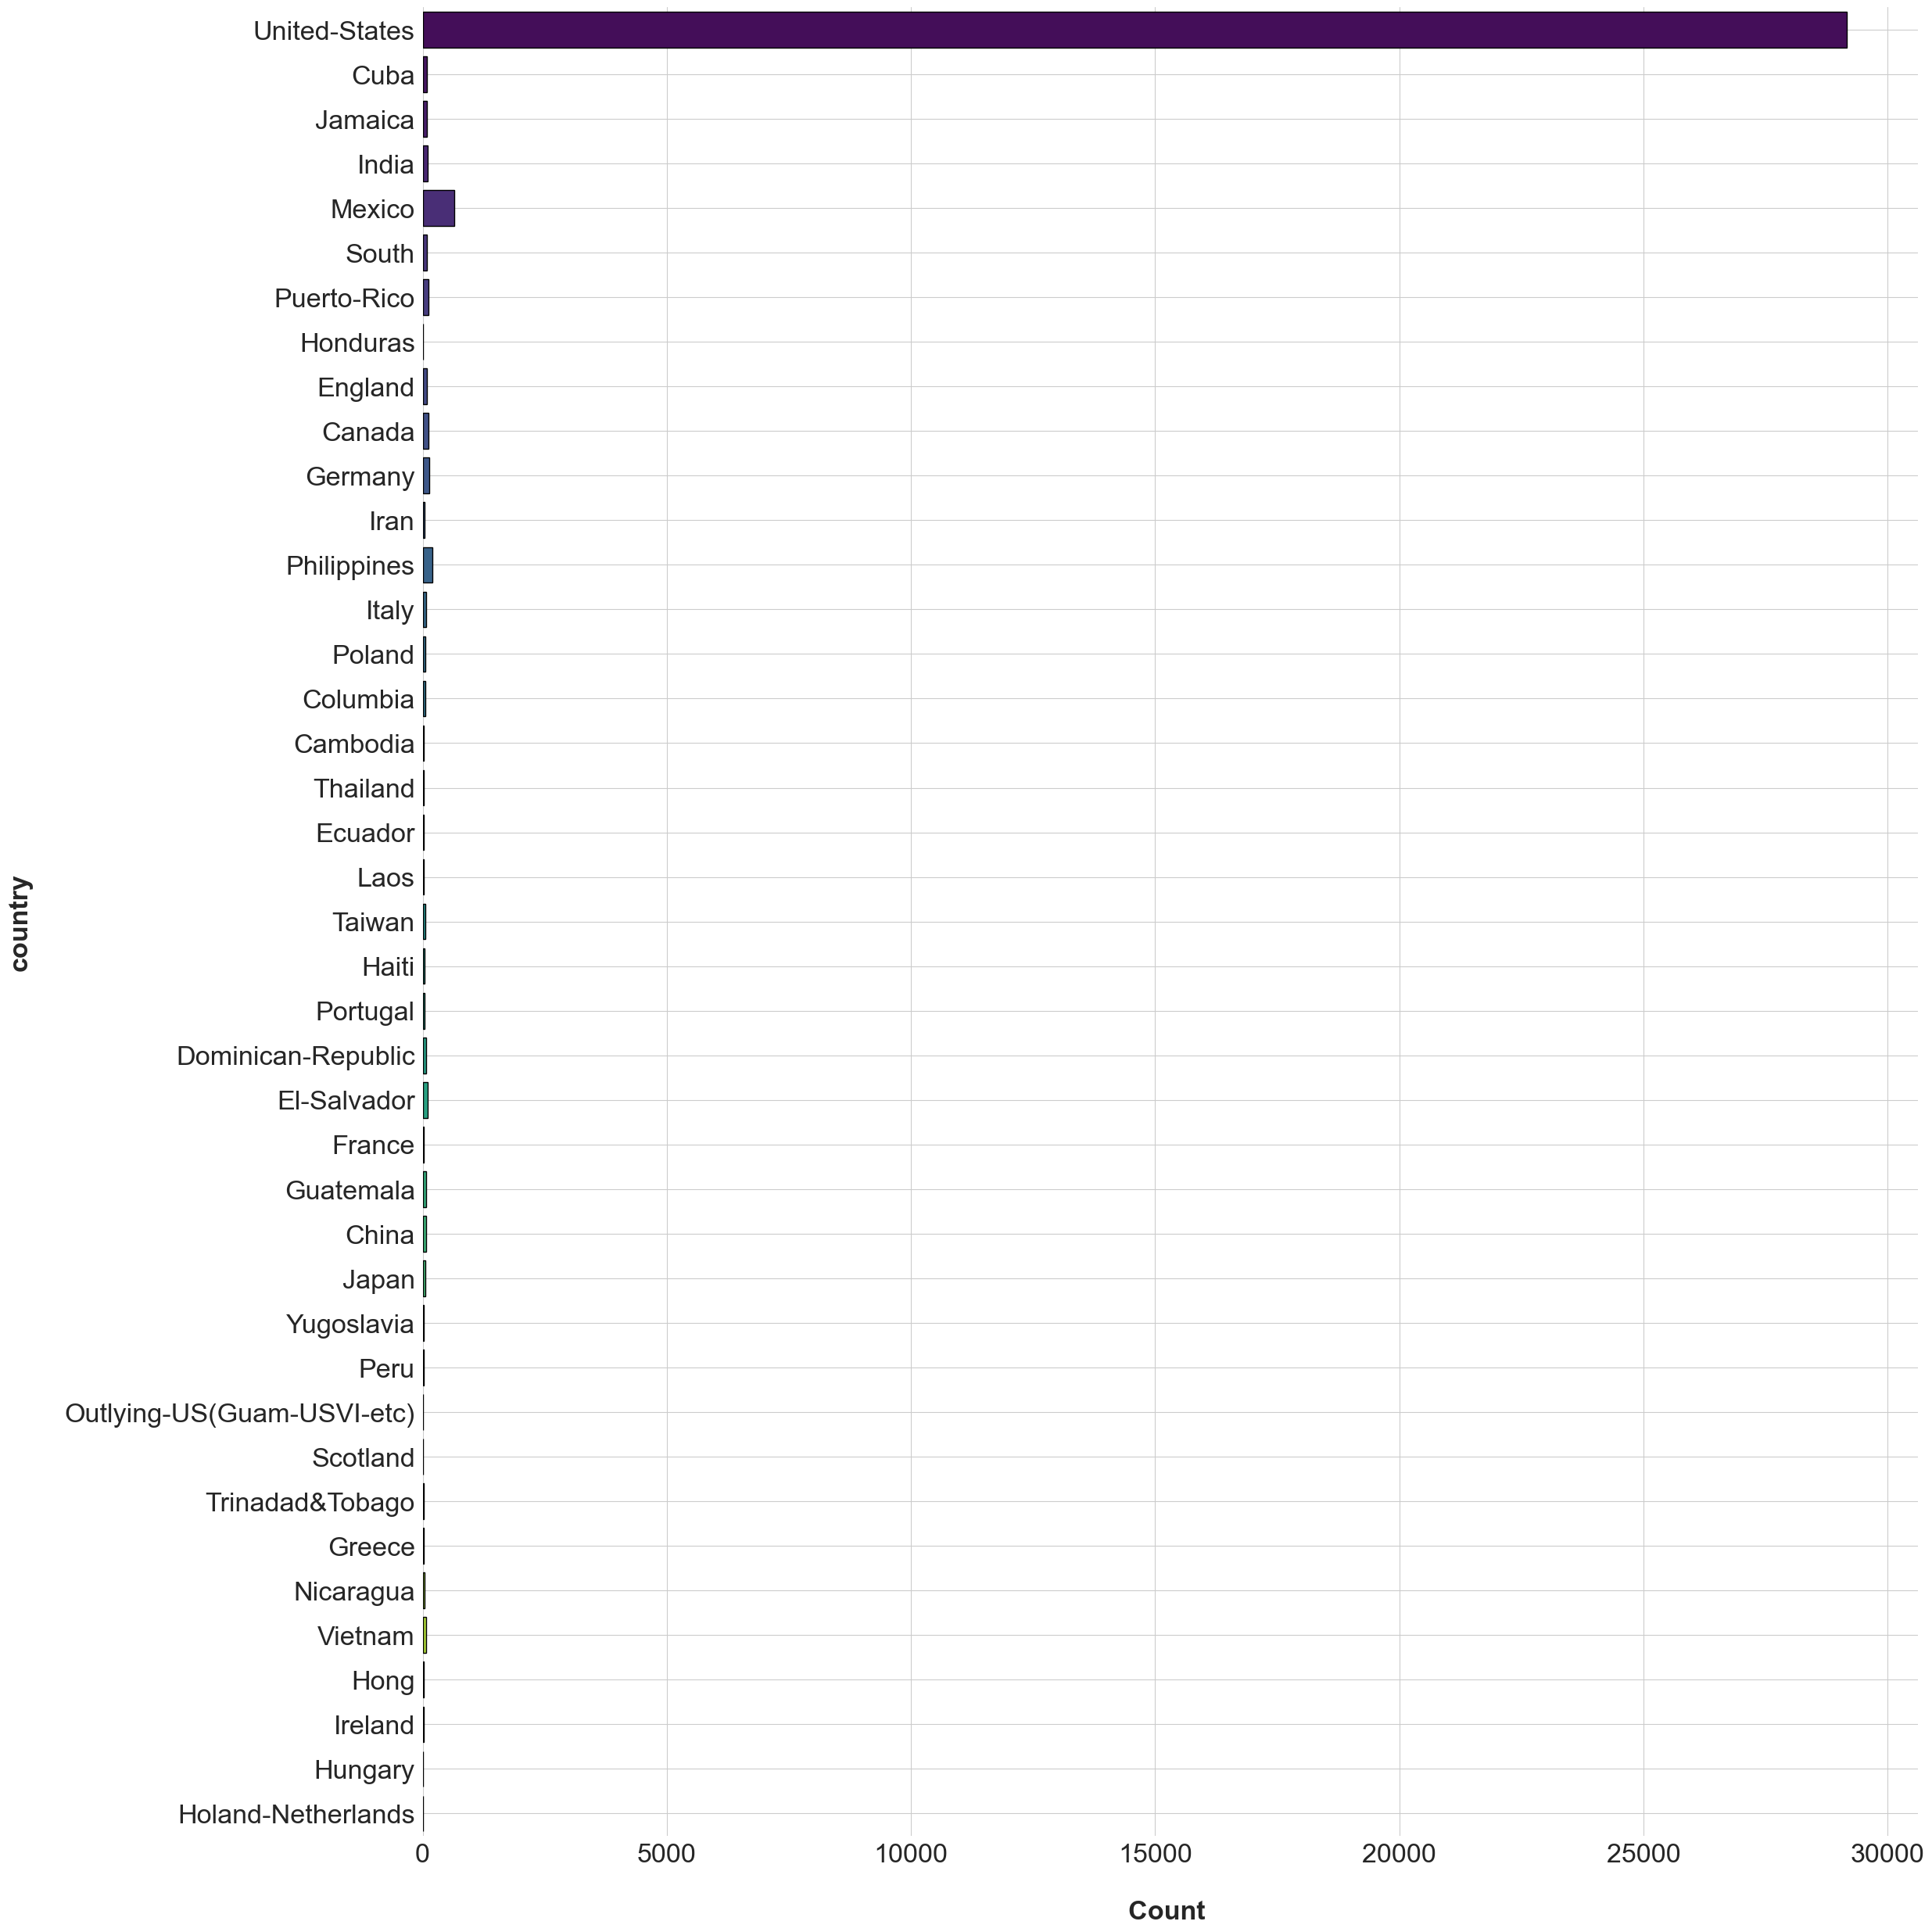

In [234]:
visualize_nominal_variables(df, 'country', False)

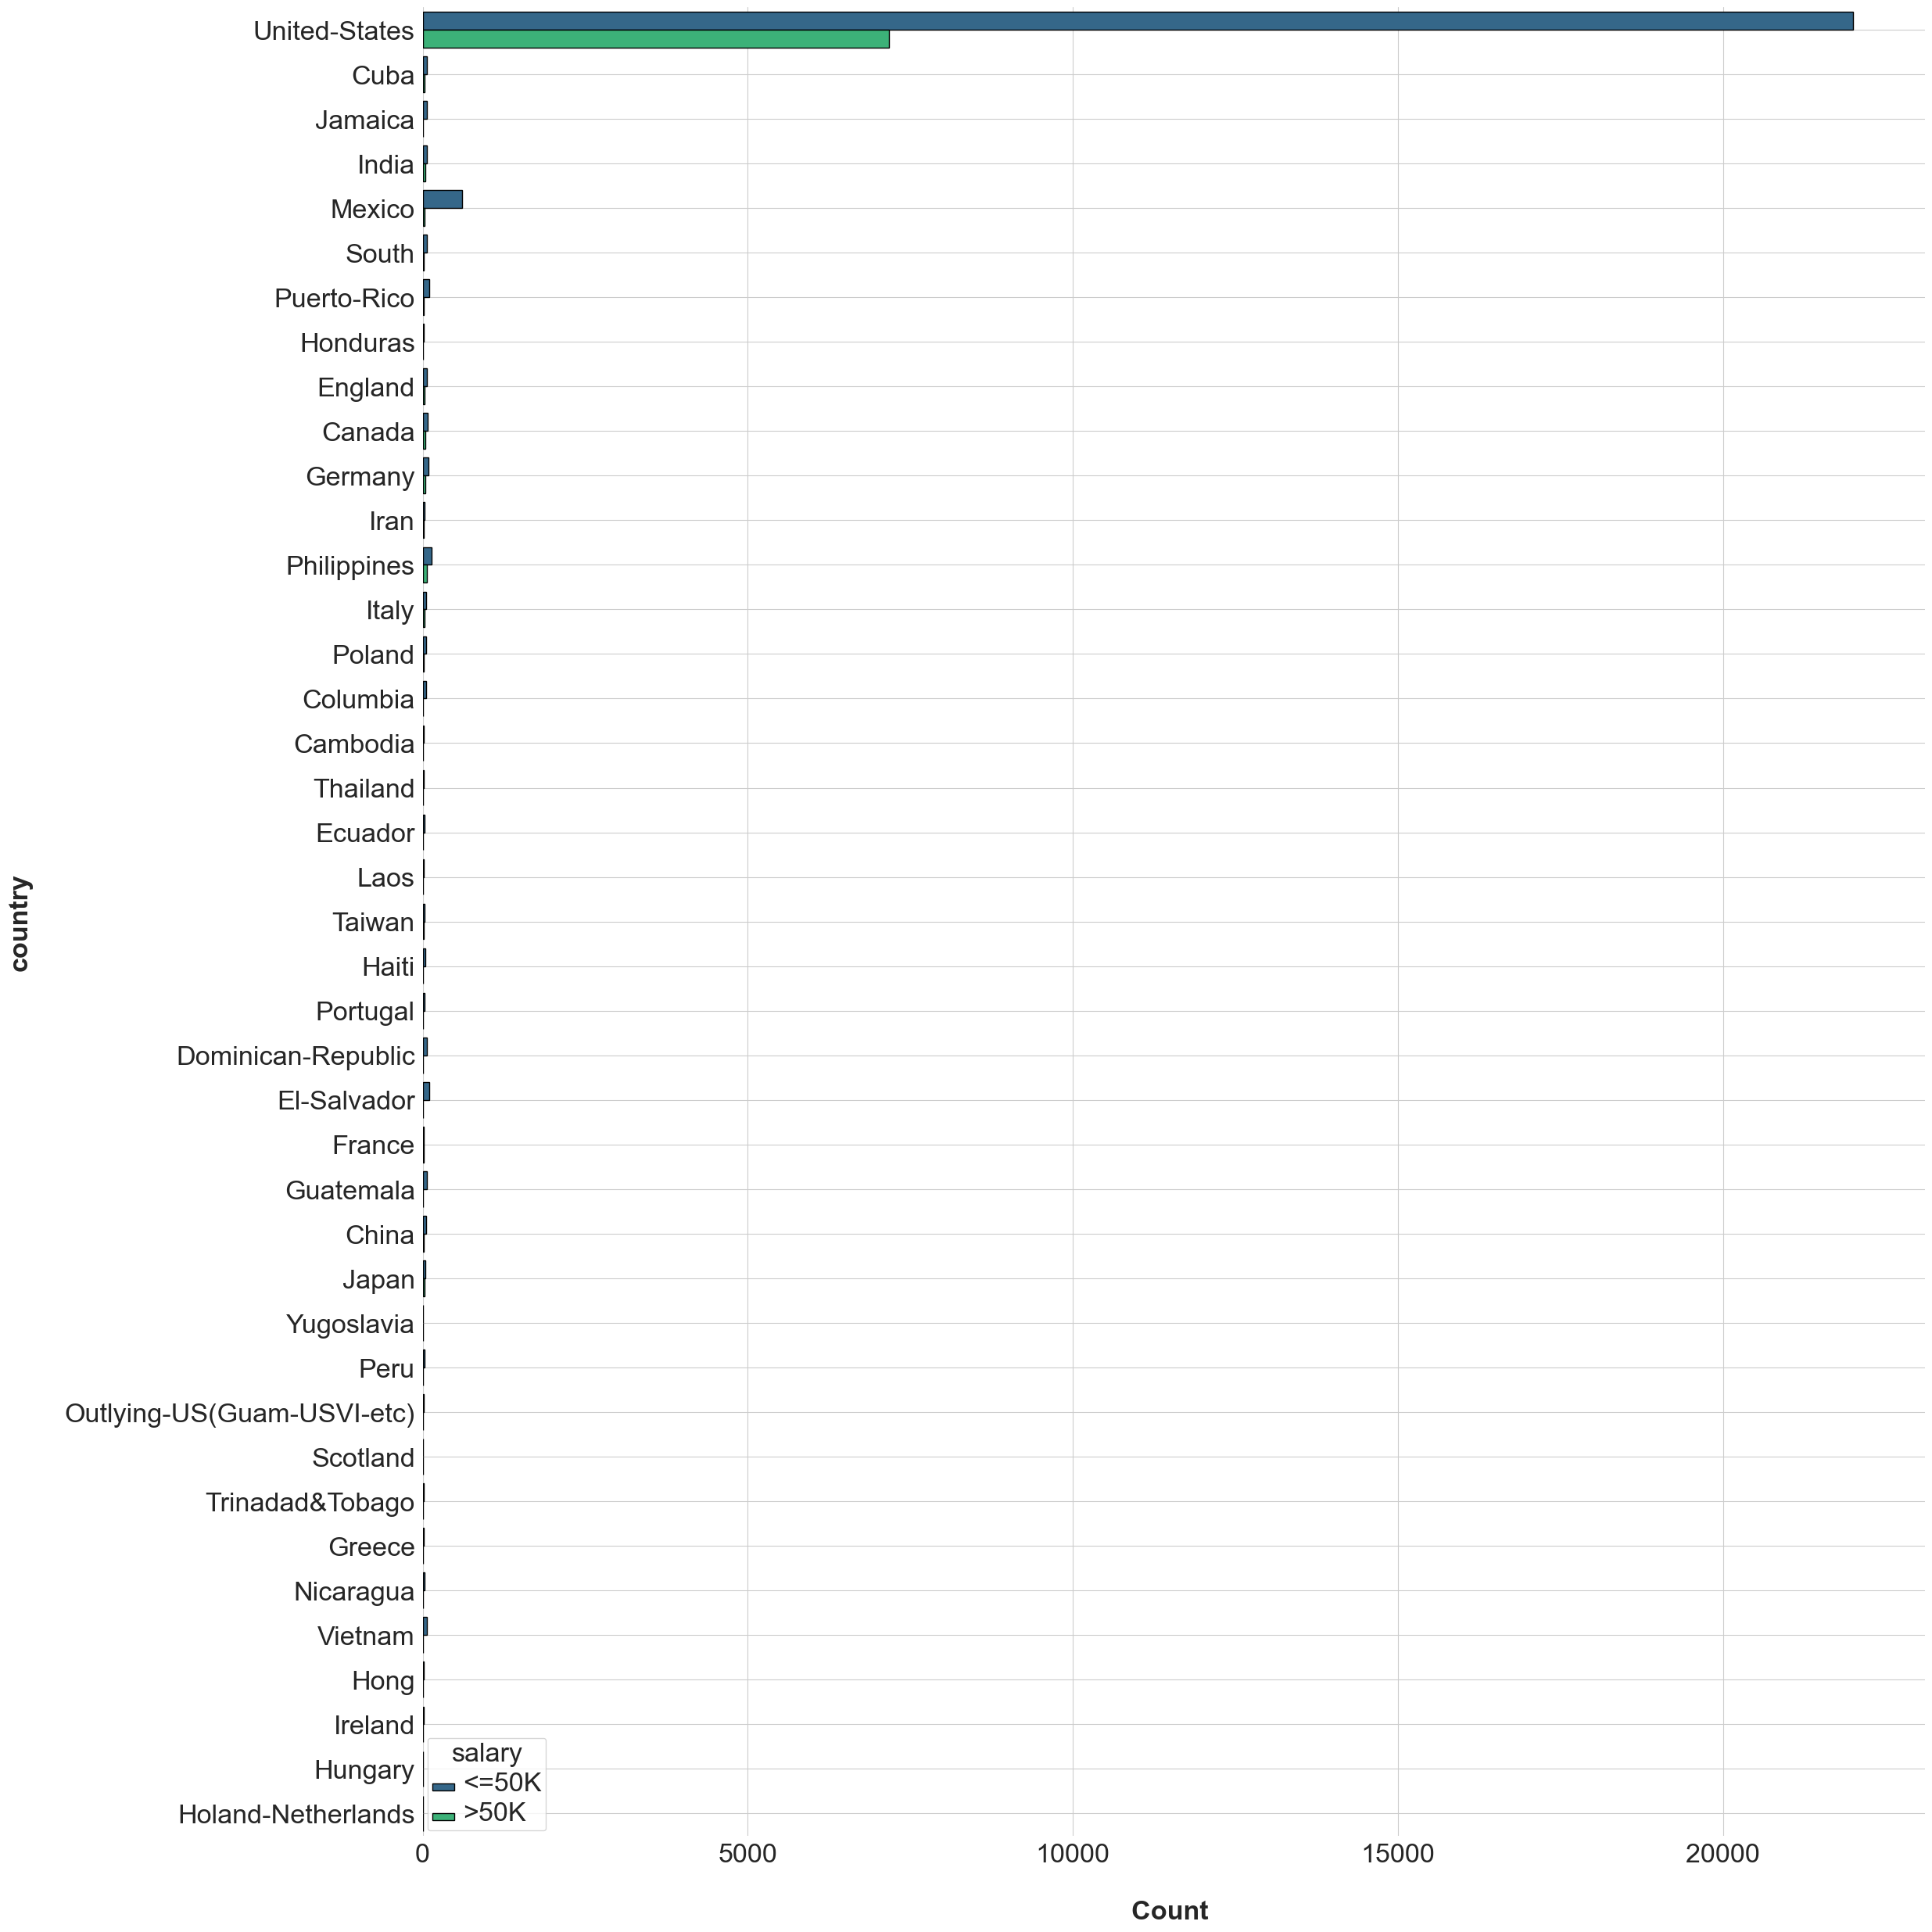

In [235]:
visualize_nominal_variables(df, 'country', True)

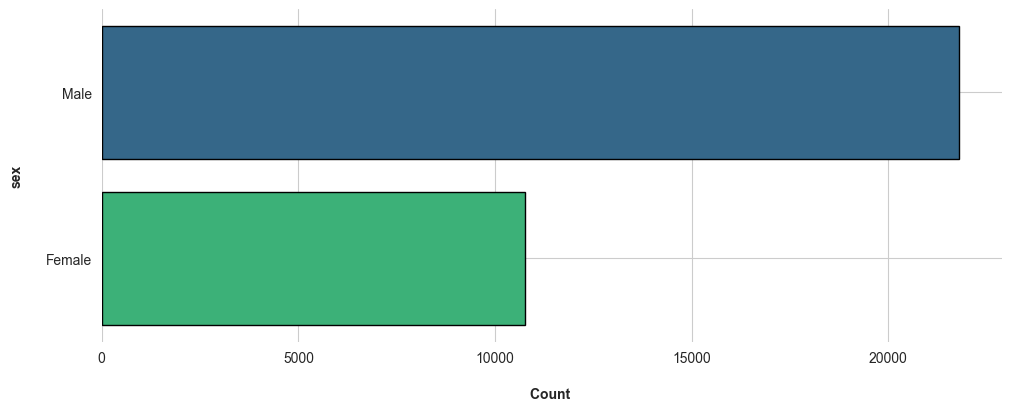

In [220]:
visualize_nominal_variables(df, 'sex', False)

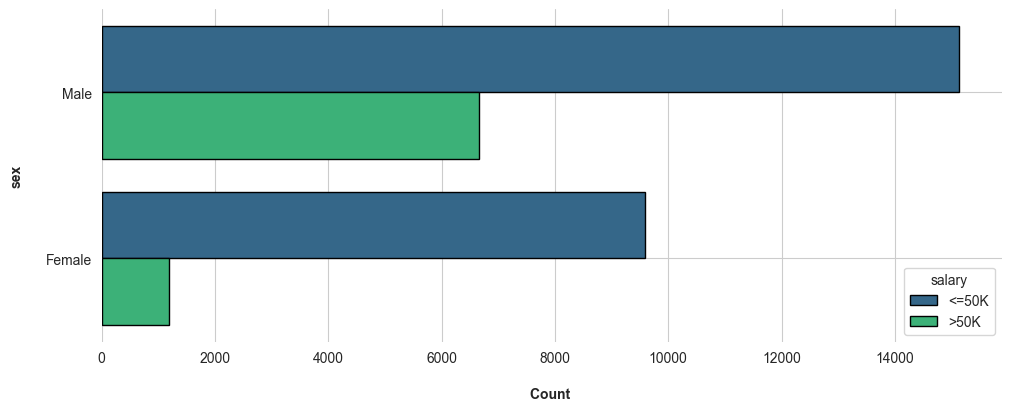

In [236]:
visualize_nominal_variables(df, 'sex', True)

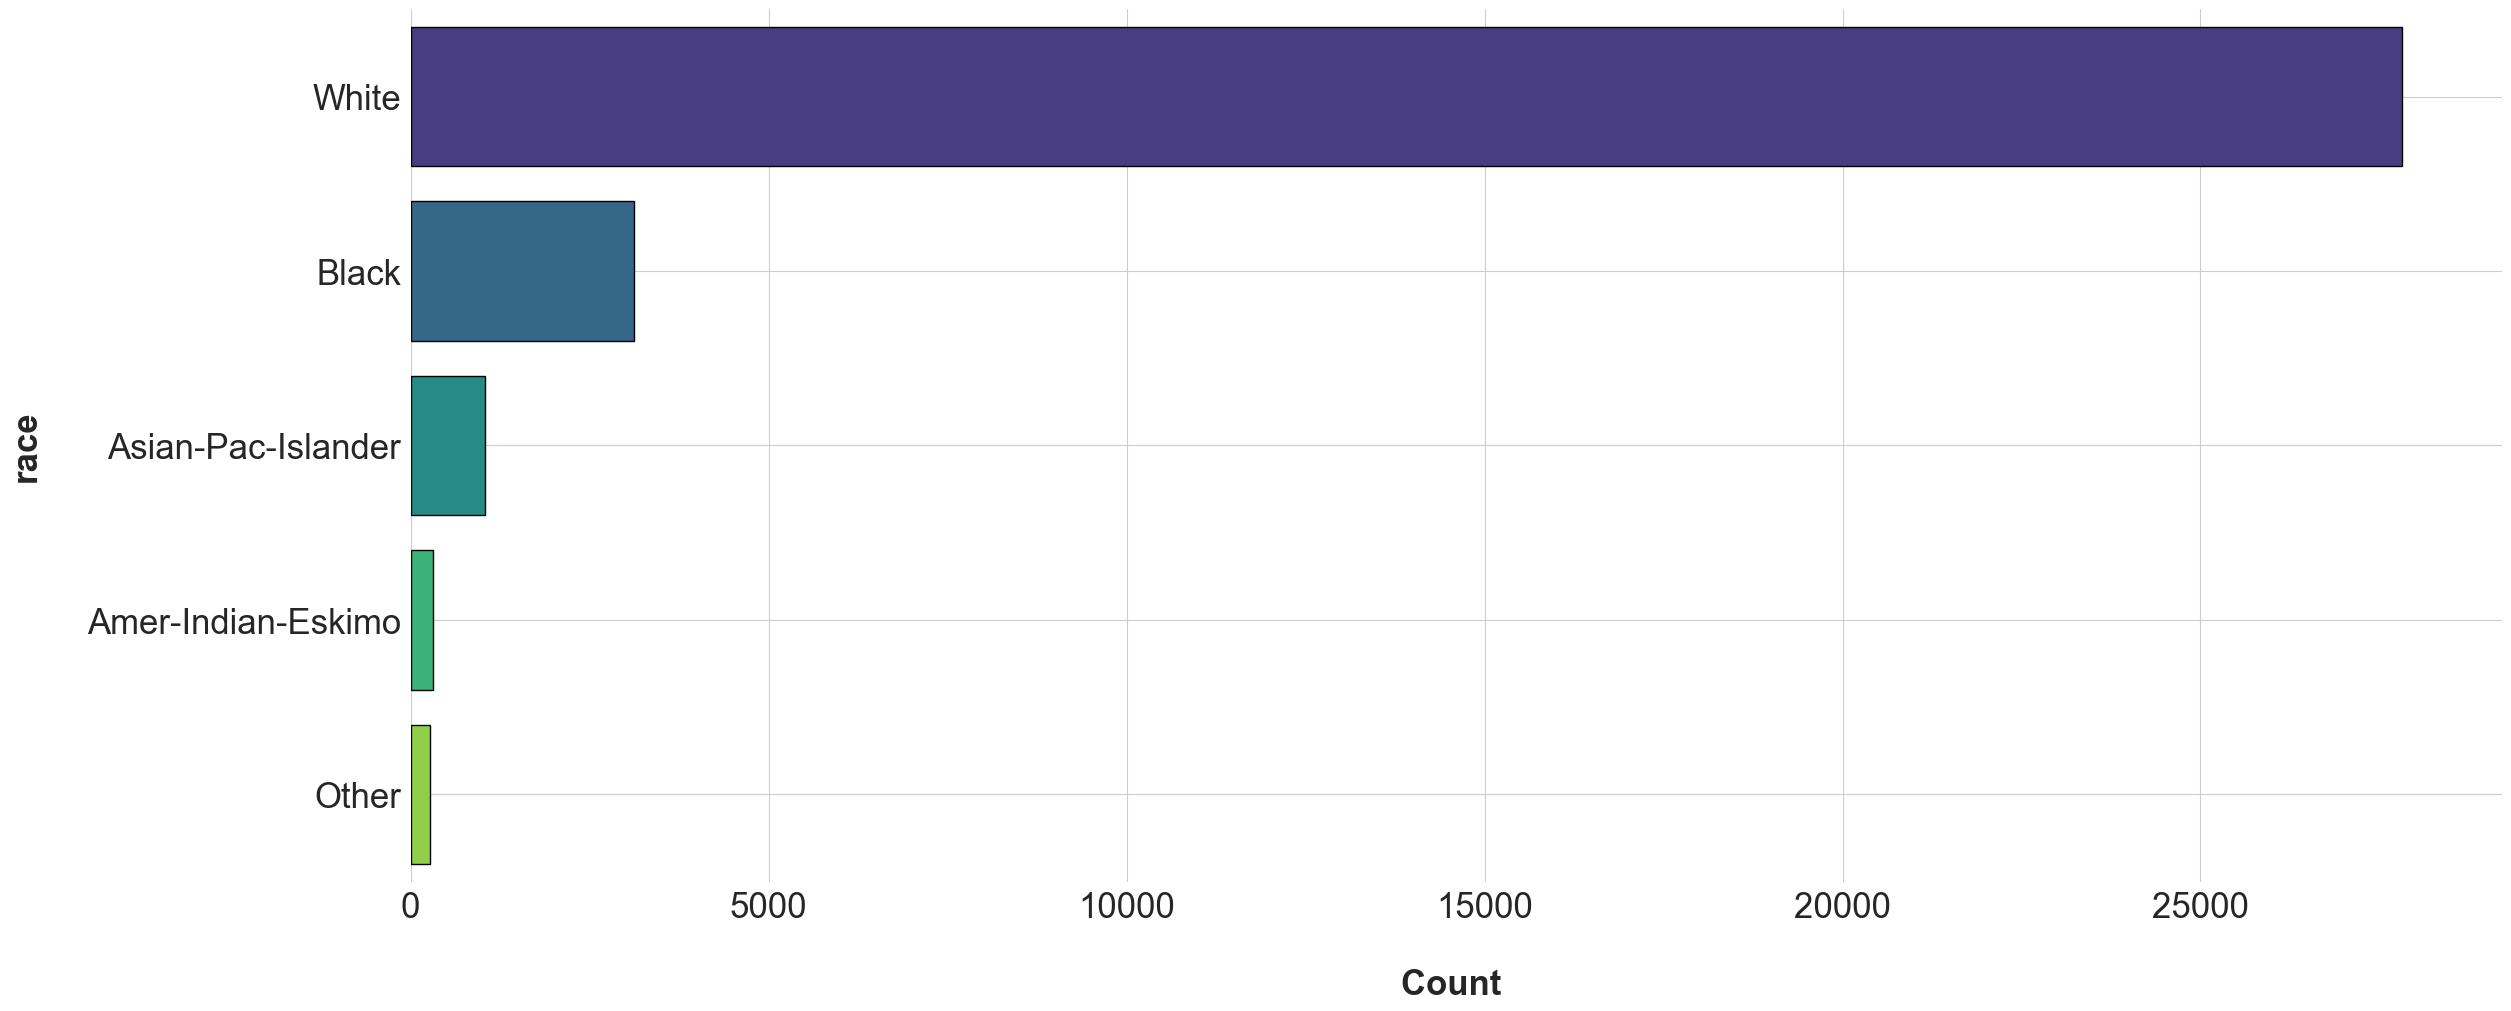

In [222]:
visualize_nominal_variables(df, 'race', False)

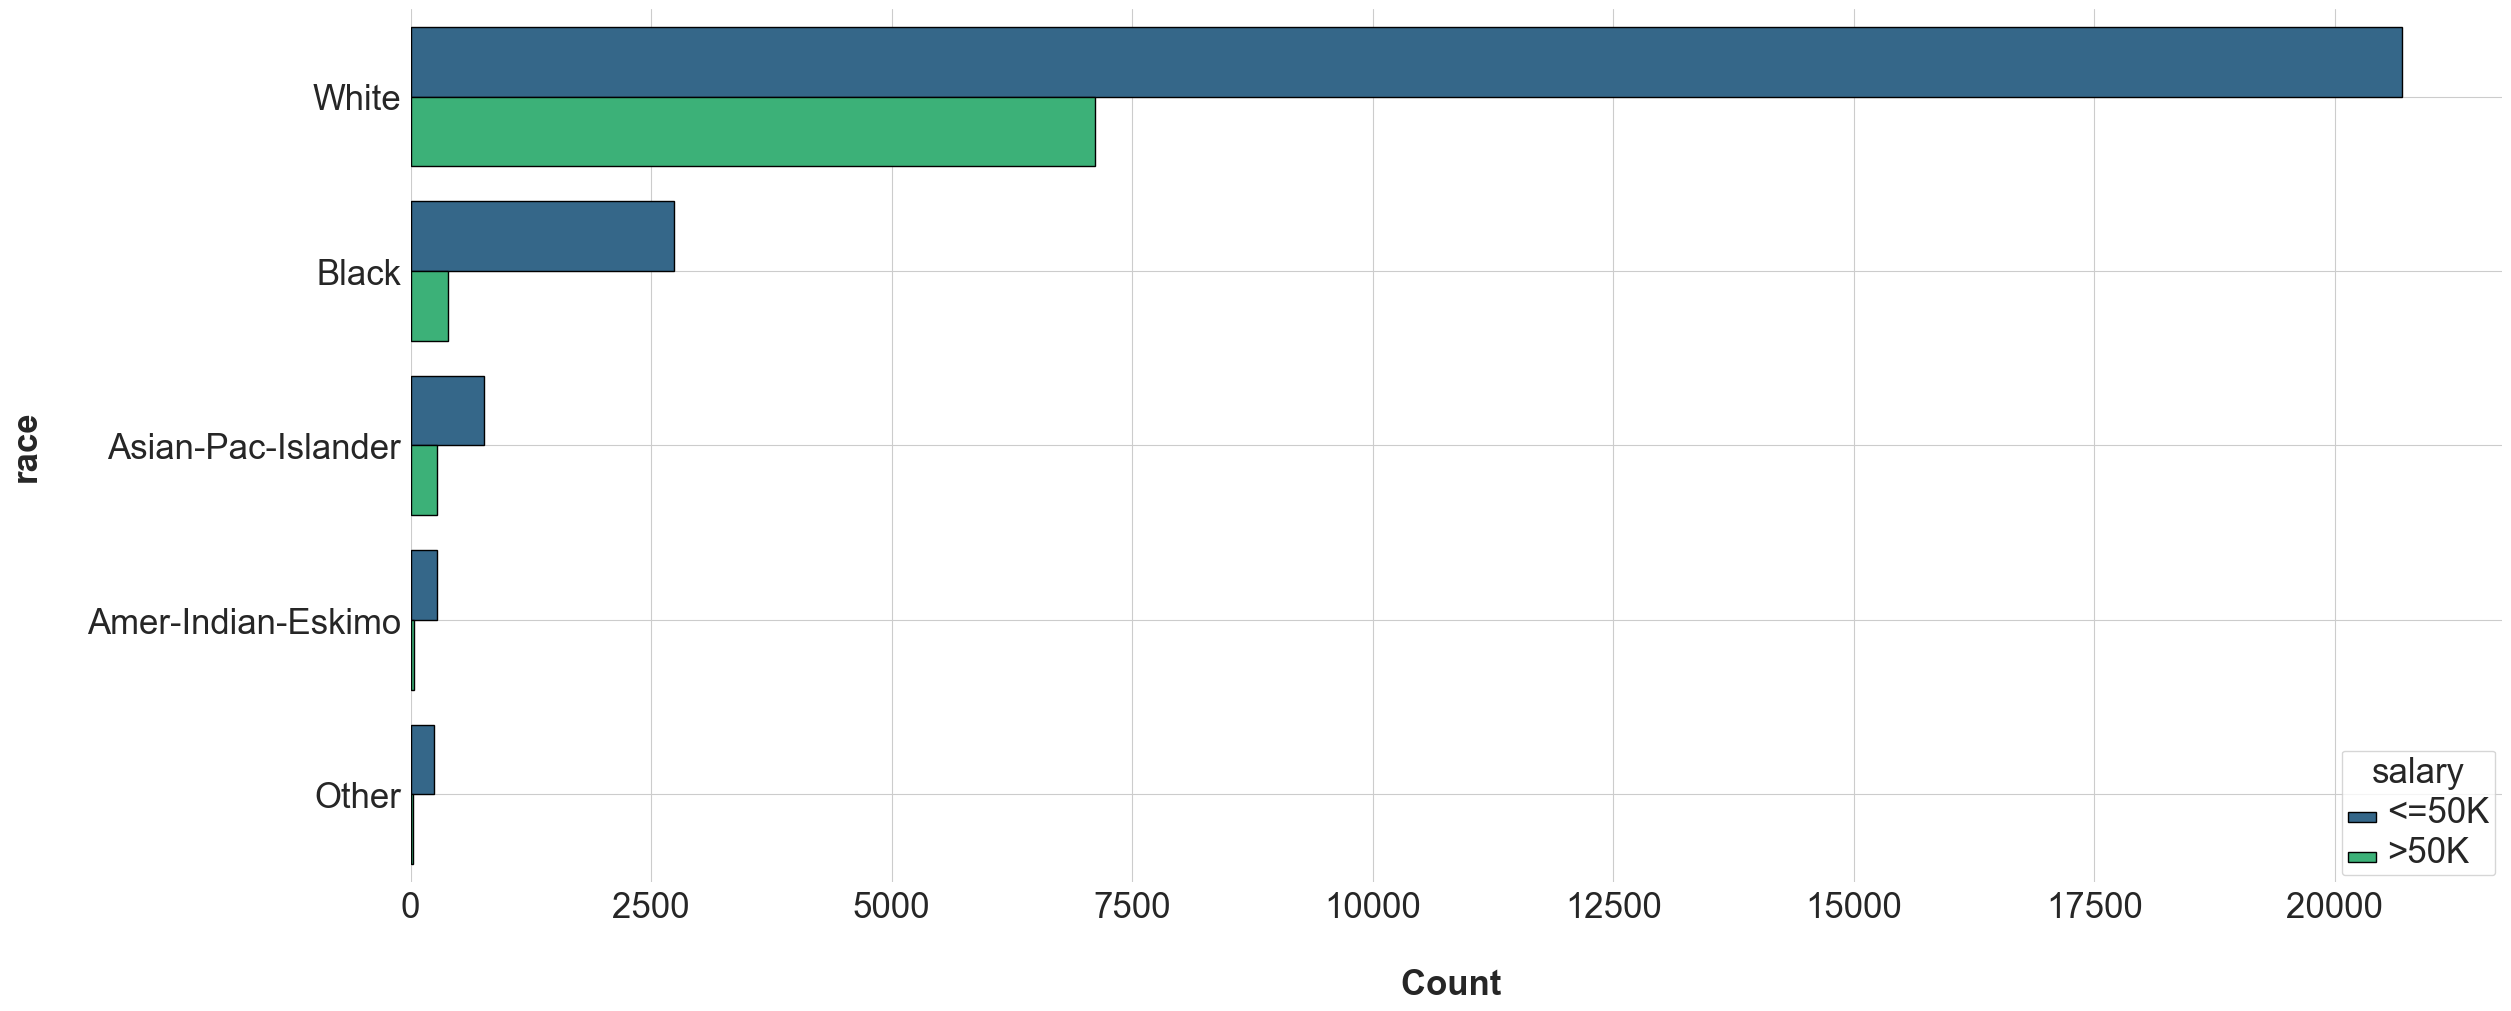

In [237]:
visualize_nominal_variables(df, 'race', True)

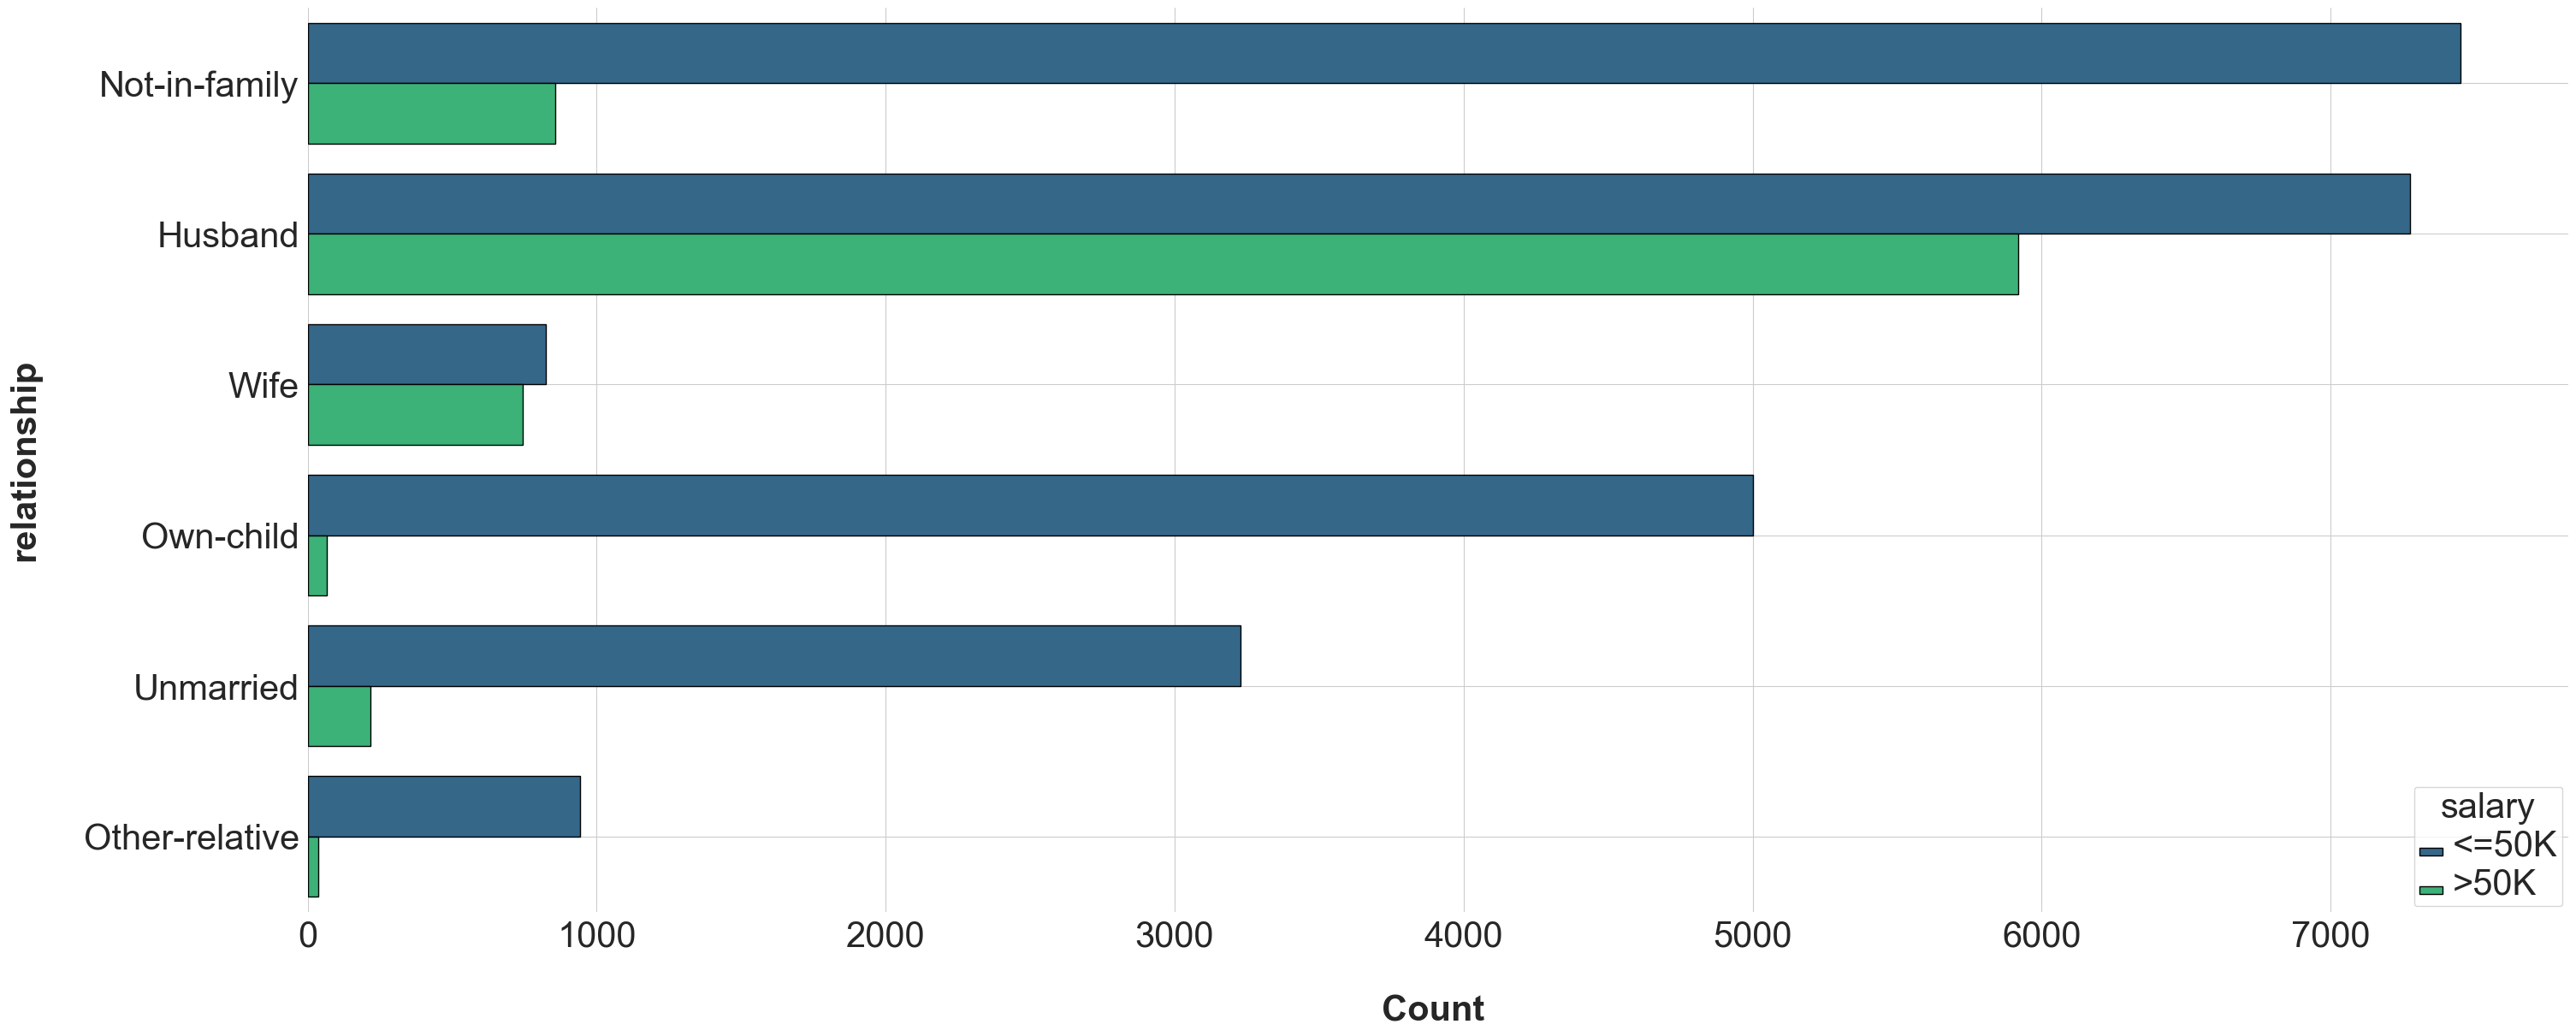

In [238]:
visualize_nominal_variables(df, 'relationship', True)

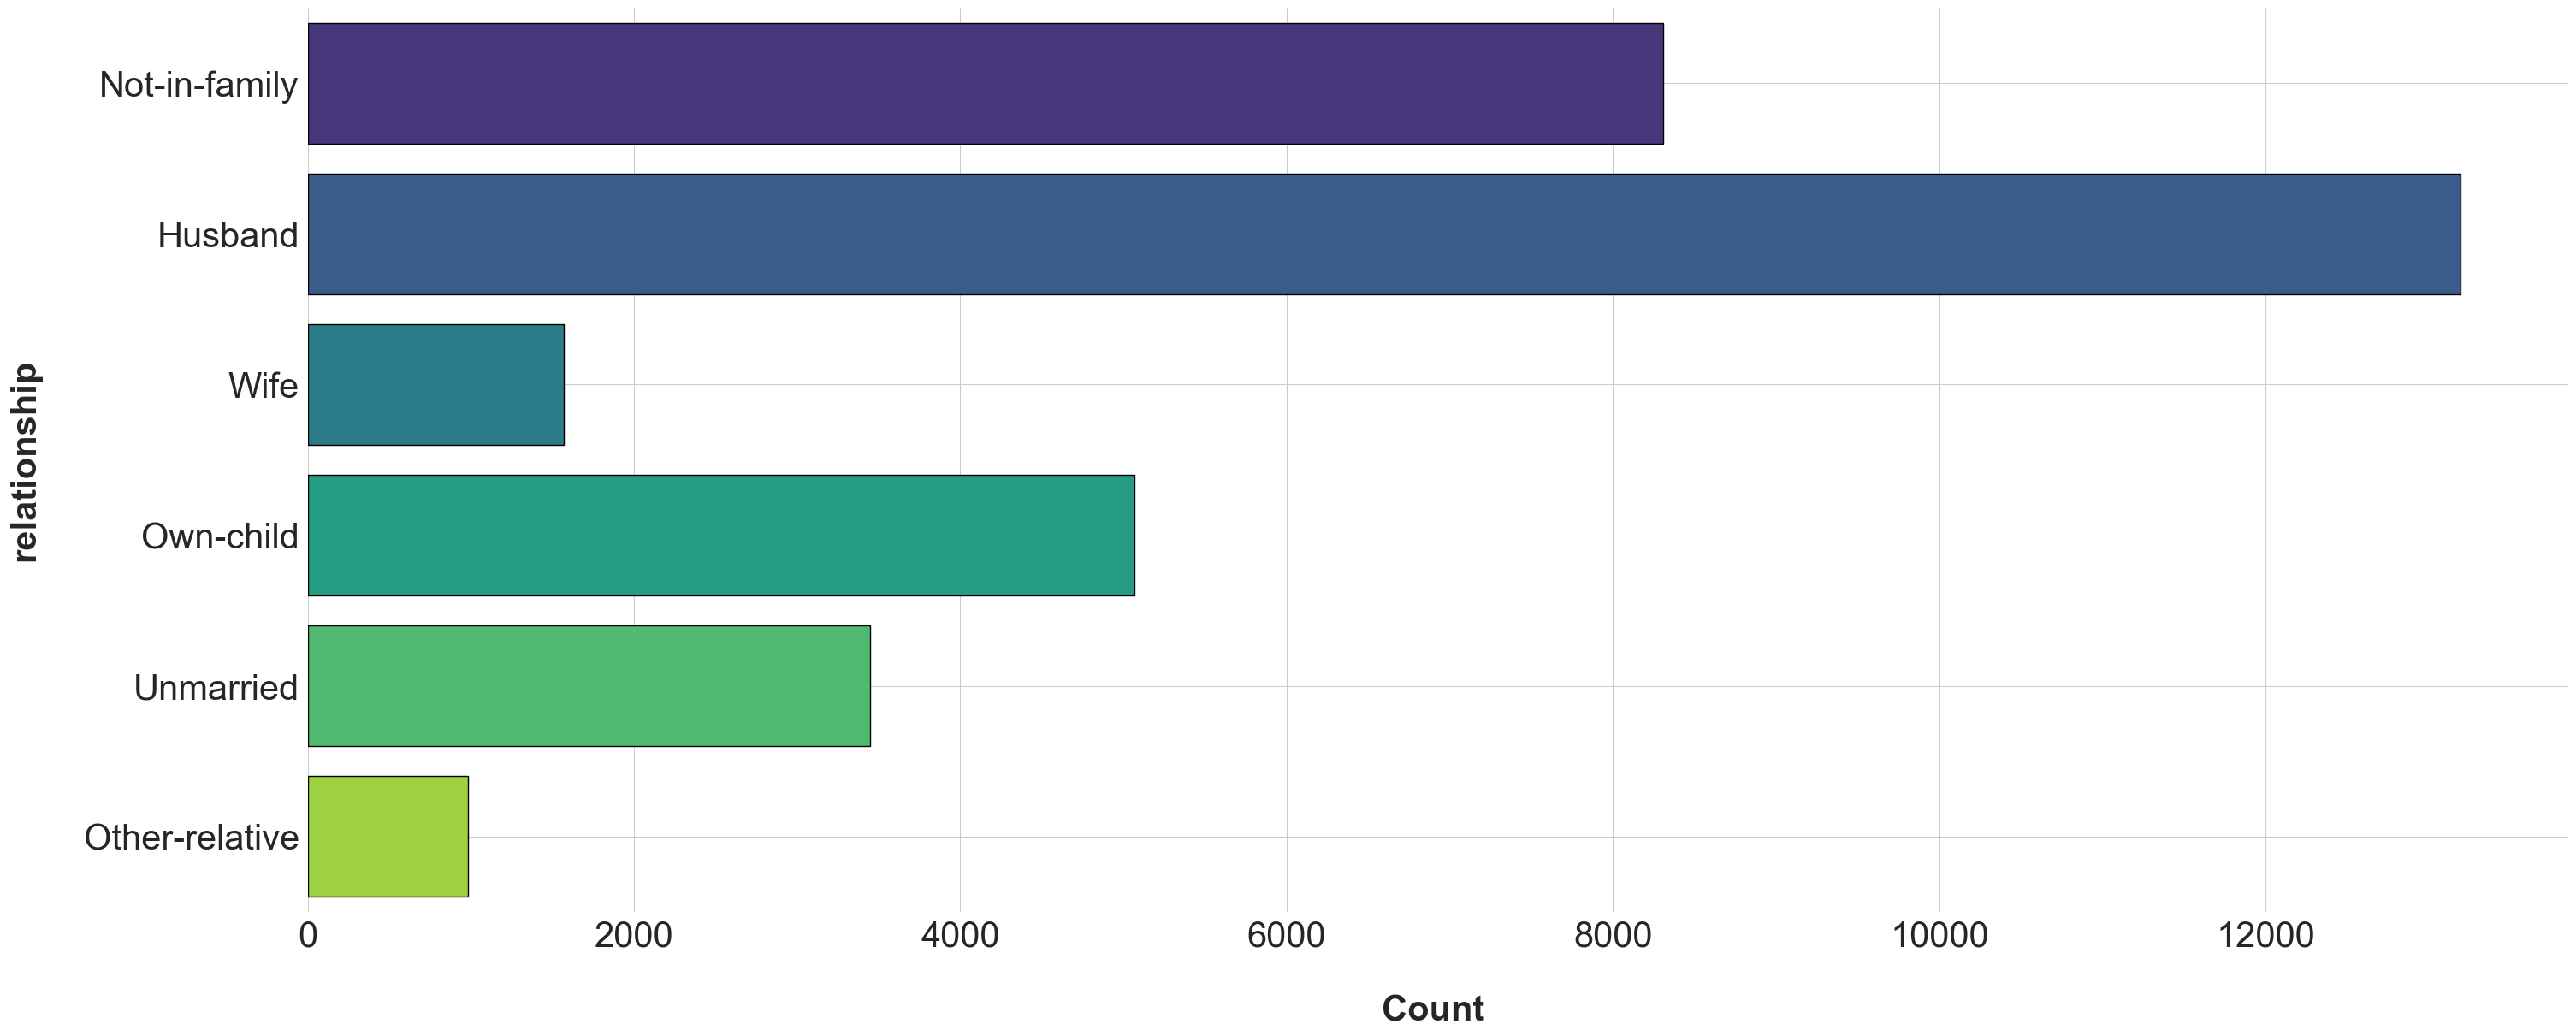

In [225]:
visualize_nominal_variables(df, 'relationship', False)

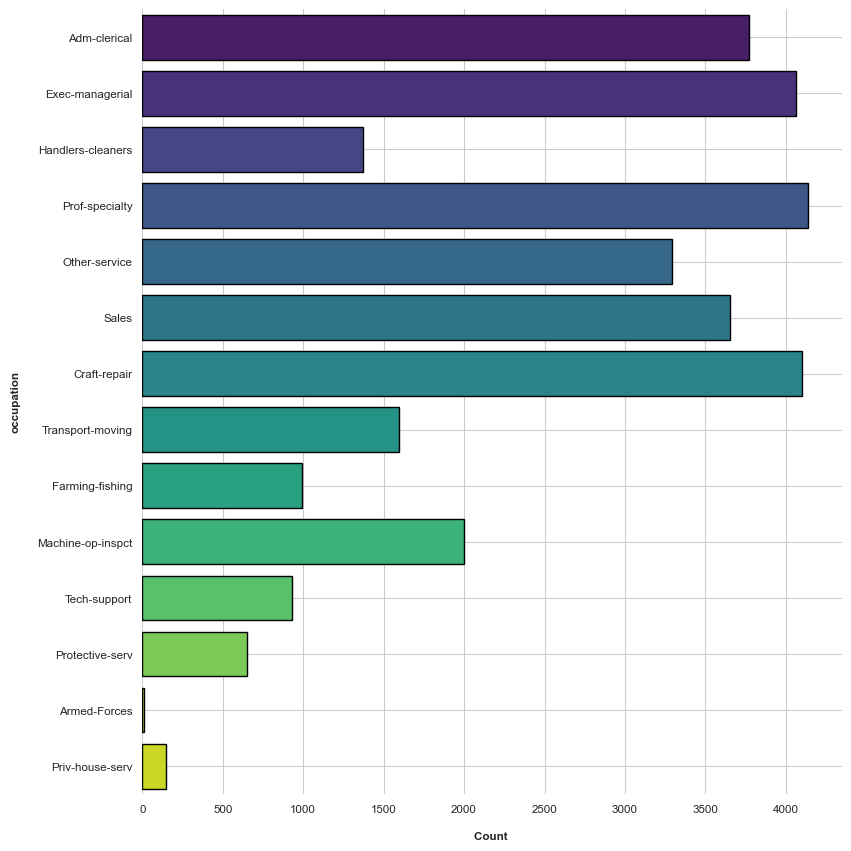

In [226]:
visualize_nominal_variables(df, 'occupation', False)

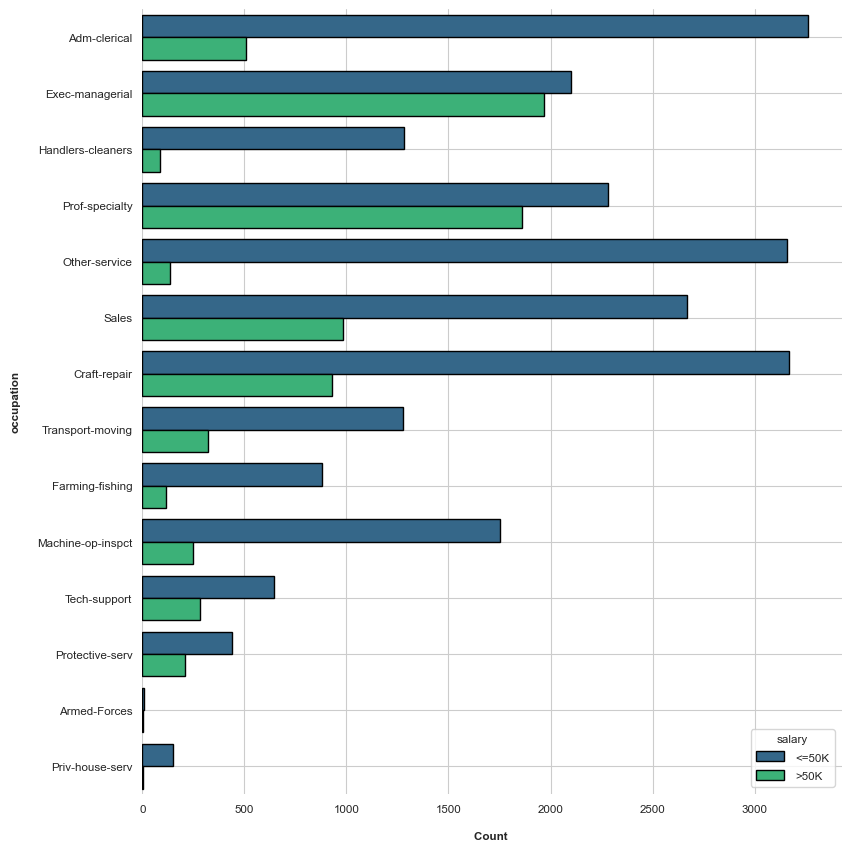

In [239]:
visualize_nominal_variables(df, 'occupation', True)

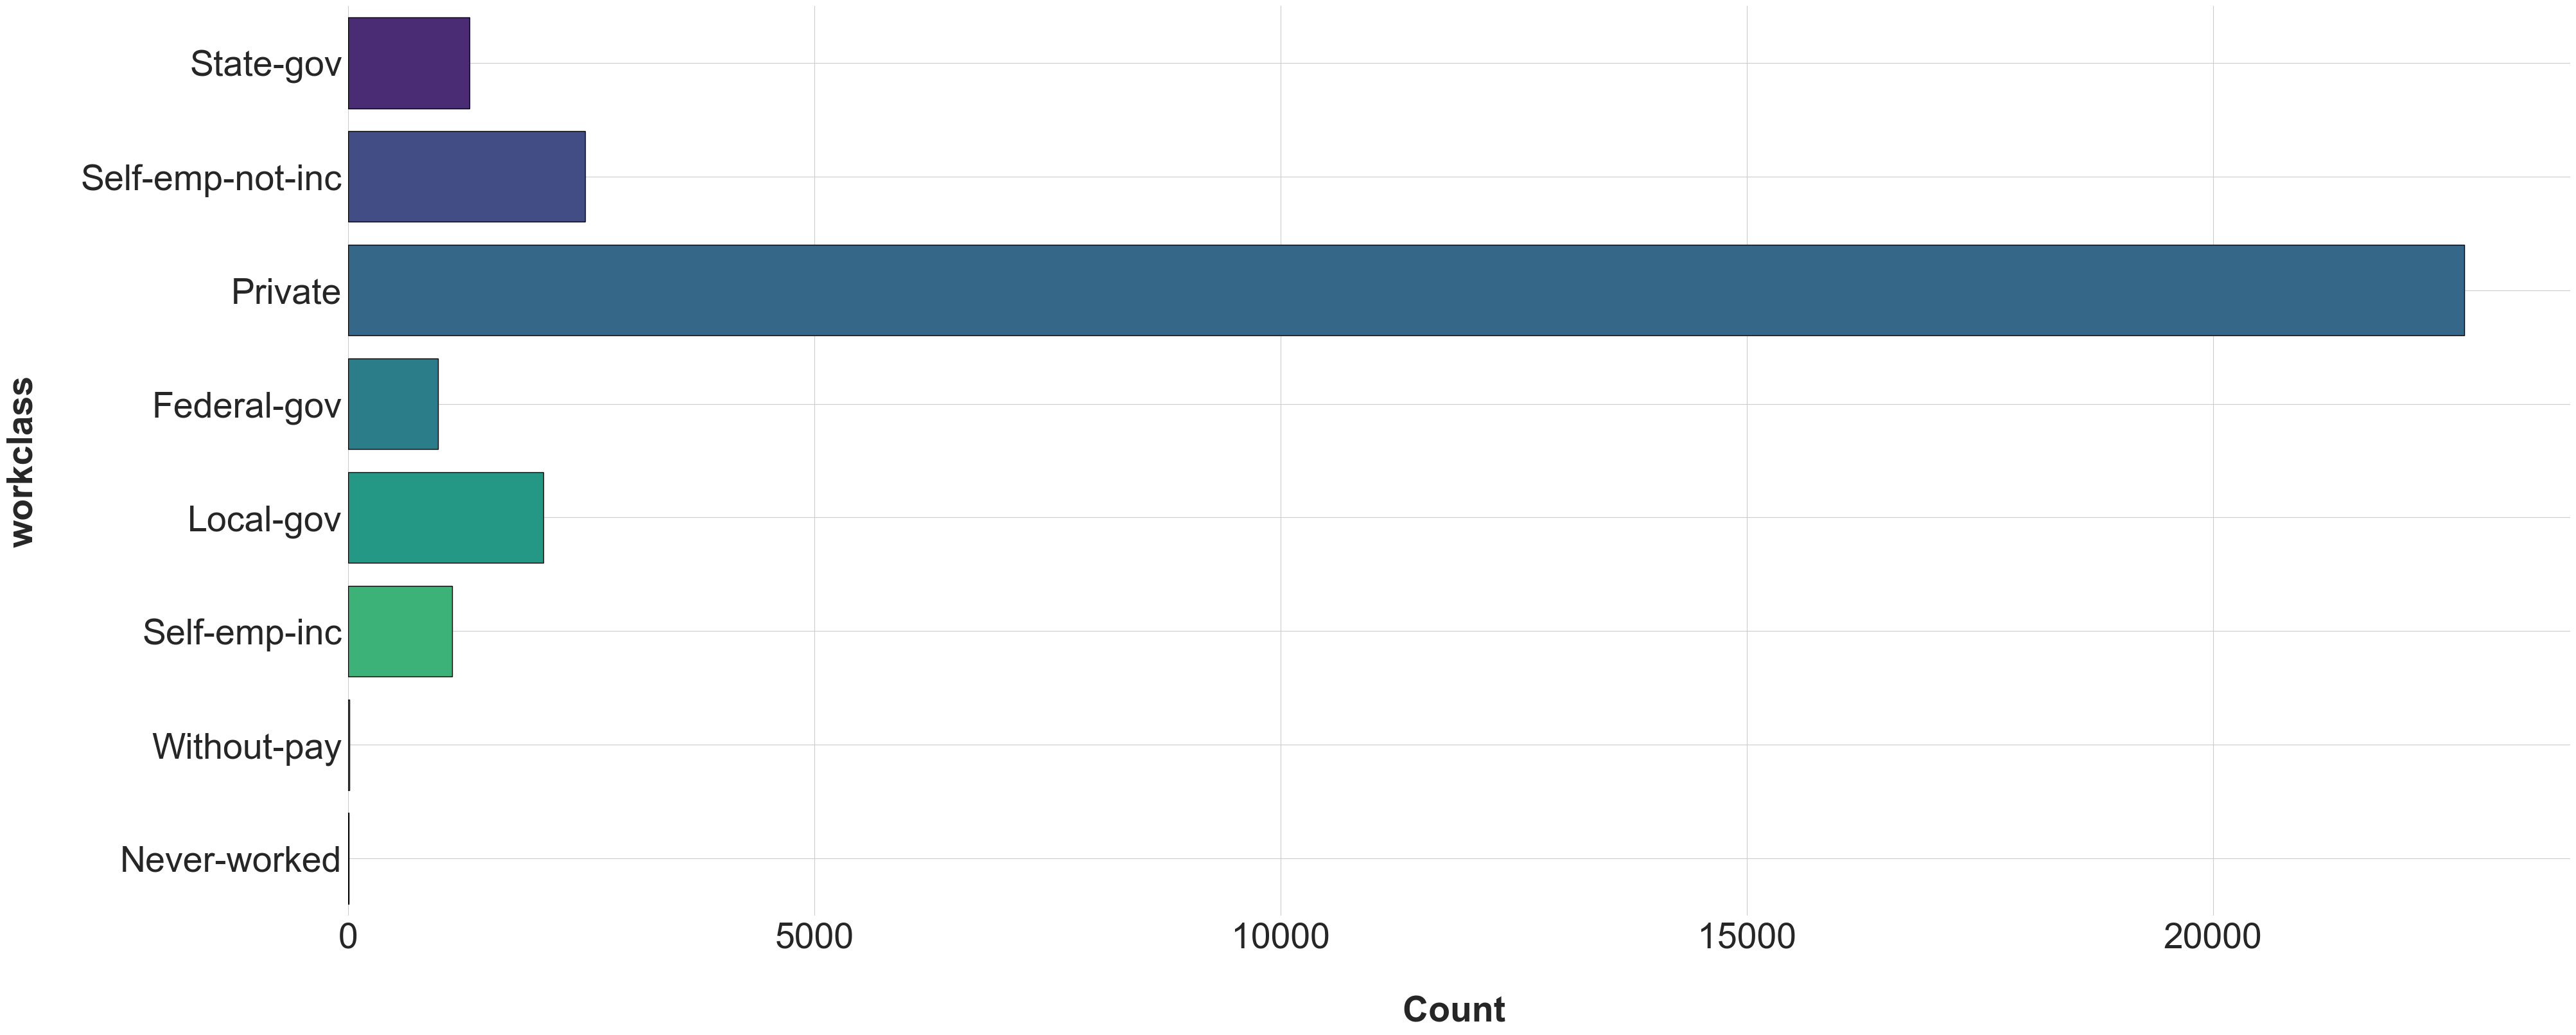

In [228]:
visualize_nominal_variables(df, 'workclass', False)

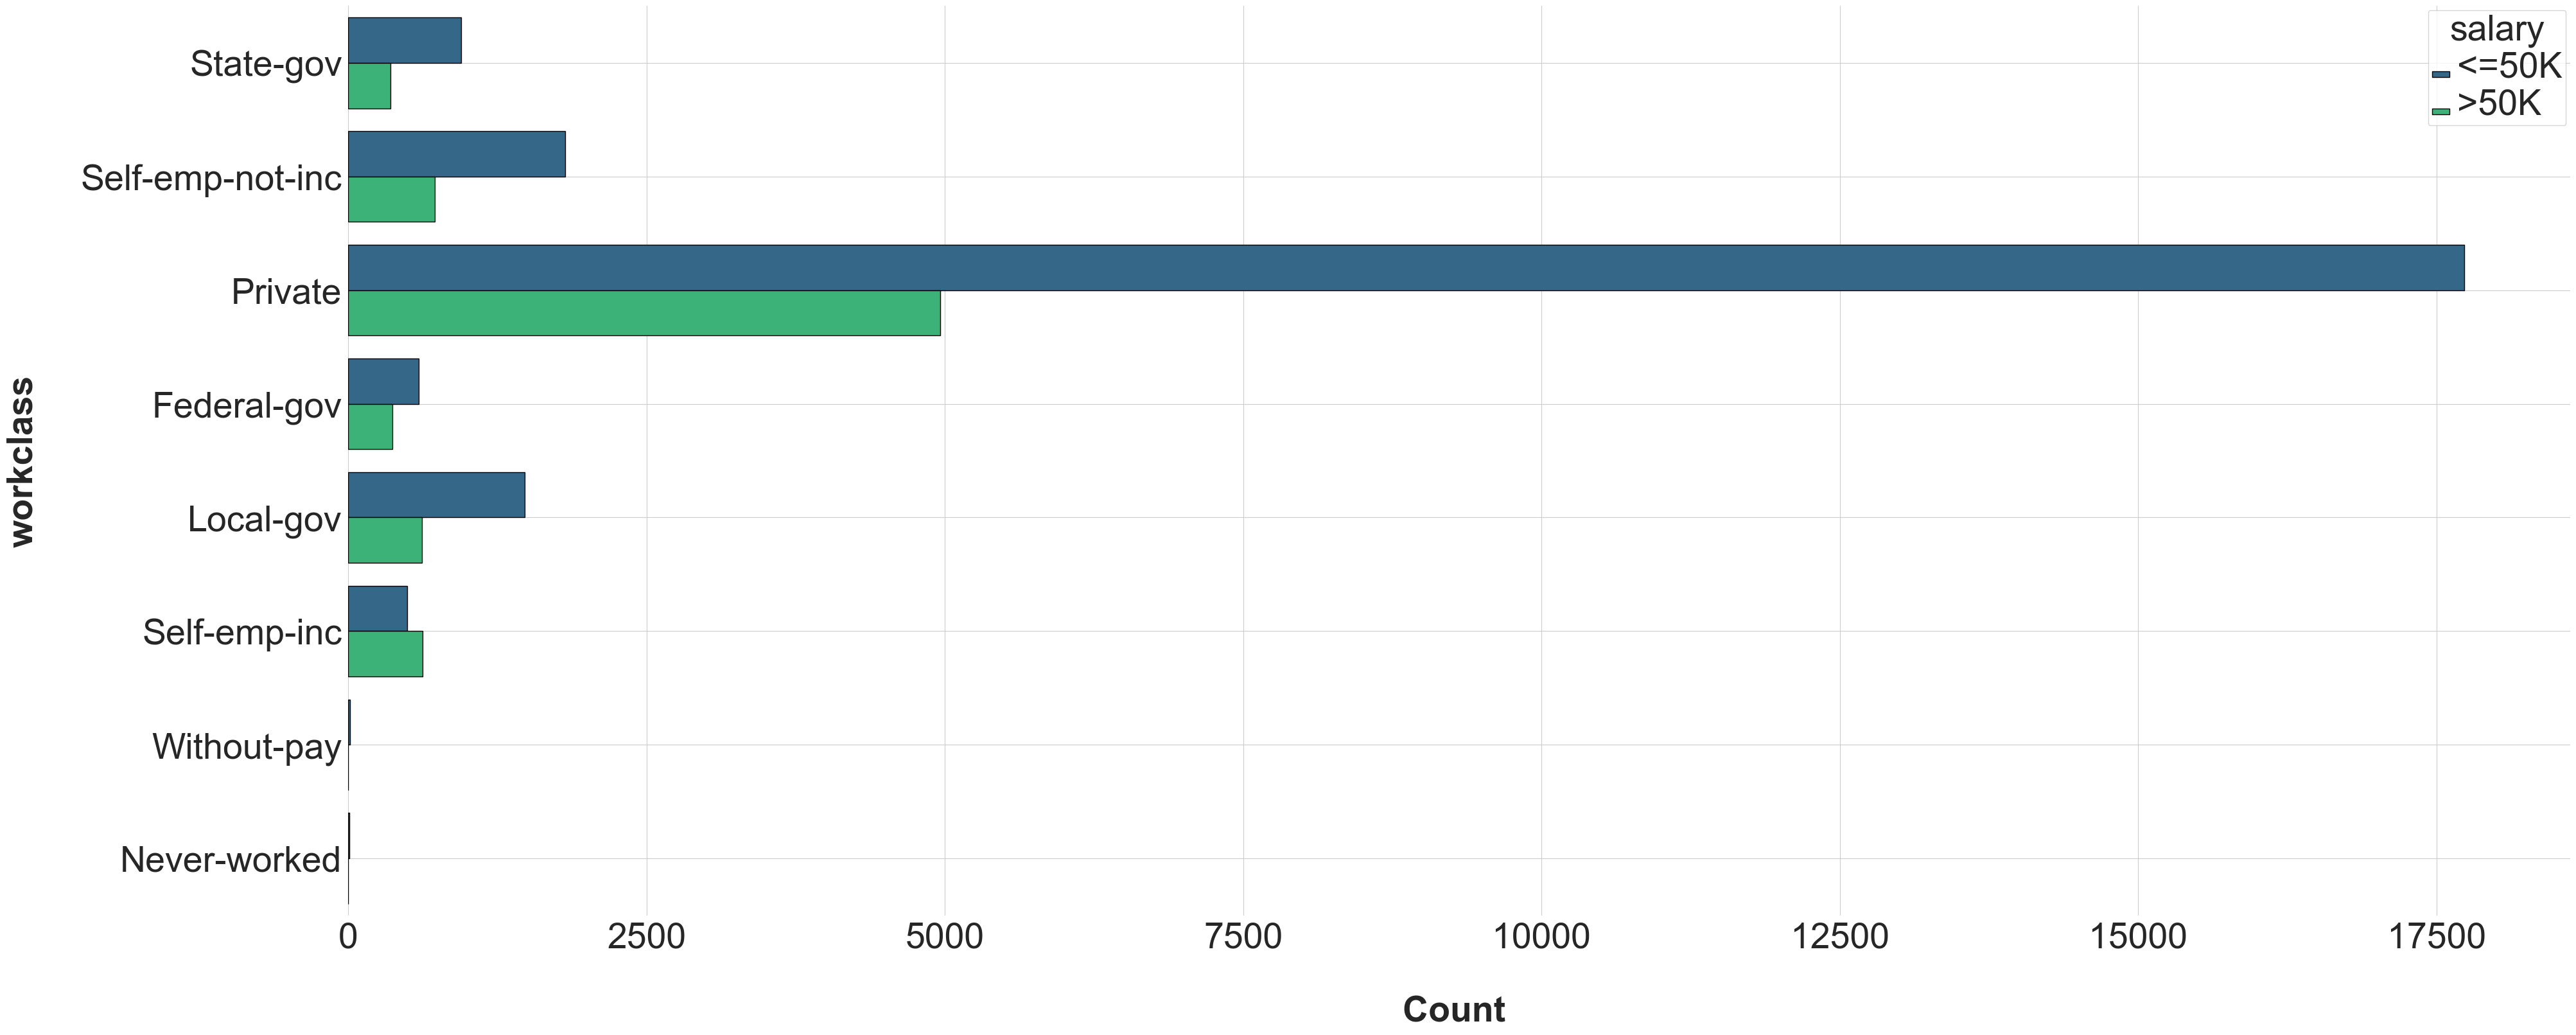

In [240]:
visualize_nominal_variables(df, 'workclass', True)

### Rare labels:

From the above categorical variables visulaization, it's clear that there are rare labels. Let's go ahead and investigate the same:

In [244]:
def identify_rare_labels(df, var, rare_perc):
    df = df.copy()
    
    #get the percentage of the labels
    tmp = df.groupby(var)['salary'].count()/len(df)
    #print(tmp)
#     workclass
#     Federal-gov         0.029483
#     Local-gov           0.064279
#     Never-worked        0.000215

    #return categories that are rare
    return tmp[tmp<rare_perc]

for var in cat_vars:
    
    print(identify_rare_labels(df, var, 0.01))
    print()

workclass
Never-worked    0.000215
Without-pay     0.000430
Name: salary, dtype: float64

marital_status
Married-AF-spouse    0.000706
Name: salary, dtype: float64

occupation
Armed-Forces       0.000276
Priv-house-serv    0.004576
Name: salary, dtype: float64

Series([], Name: salary, dtype: float64)

race
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: salary, dtype: float64

Series([], Name: salary, dtype: float64)

country
Cambodia                      0.000584
Canada                        0.003716
China                         0.002303
Columbia                      0.001812
Cuba                          0.002918
Dominican-Republic            0.002150
Ecuador                       0.000860
El-Salvador                   0.003255
England                       0.002764
France                        0.000891
Germany                       0.004207
Greece                        0.000891
Guatemala                     0.001966
Haiti                         0.001351
Hol

Some of the categorical variables show multiple labels that are present in less than 1% of the salary.

Labels that are under-represented in the dataset tend to cause over-fitting of machine learning models.

That is why we want to remove them/encode them as single entity. Will be covered in Feature Engineering Section.